In [311]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy, pickle
import matplotlib
from matplotlib.lines import Line2D

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc
from neurolib.optimal_control import cost_functions as cost_functions
from neurolib.optimal_control.oc_utils.plot_oc import get_prc, plot_prc, ops_plot_traces, ops_ap_scenes_allpoints, ops_plotsubset, ops_plotall
import scipy

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fs_ = 16

plt.rcParams["axes.titlesize"] = fs_
plt.rcParams["axes.labelsize"] = fs_
plt.rcParams["lines.markersize"] = 8
plt.rcParams.update({"font.size": fs_})
matplotlib.rc("xtick", labelsize=fs_)
matplotlib.rc("ytick", labelsize=fs_)
plt.rc("legend", fontsize=fs_)

In [3]:
wc = WCModel()
wc.params.sigma_ou = 0.
dt = 0.001
wc.params.dt = dt
duration = 300.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)

wc.params["duration"] = duration

points = [[1.,0.], [2.5,0.], [2.6, 1.2], [1.75, 0.], [2.8, 1.2]]
periods_ddt = np.zeros((5))
for i in range(len(points)):
    wc.params["exc_ext"] = zero_input + points[i][0]
    wc.params["inh_ext"] = zero_input + points[i][1]

    if i == 4:
        wc.params.c_excinh = 10.
        wc.params.c_inhexc = 16.
        wc.params.c_inhinh = 1.

    wc.run()
    peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
    p_list = []
    for j in range(3,len(peaks)):
        p_list.append(peaks[j]- peaks[j-1])
    periods_ddt[i] = np.mean(p_list)*dt


print(periods_ddt)

[18.40892308 18.80876923 16.90821429 14.96705882 13.34375   ]


In [145]:
wc = WCModel()
wc.params.sigma_ou = 0.
dt = 0.01
wc.params.dt = dt
duration = 300.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)

wc.params["duration"] = duration

points = [[1.,0.], [2.5,0.], [2.6, 1.2], [1.75, 0.], [2.8, 1.2]]
periods = np.zeros((5))
mh = np.zeros((5))
for i in range(len(points)):
    wc.params["exc_ext"] = zero_input + points[i][0]
    wc.params["inh_ext"] = zero_input + points[i][1]

    if i == 4:
        wc.params.c_excinh = 10.
        wc.params.c_inhexc = 16.
        wc.params.c_inhinh = 1.

    wc.run()
    peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
    p_list = []
    for j in range(3,len(peaks)):
        p_list.append(peaks[j]- peaks[j-1])
    periods[i] = np.mean(p_list)*dt

    mh[i] = max(np.amax(wc.exc[0,:]), np.amax(wc.inh[0,:]))

print(periods)
print(mh)
print(periods_ddt/periods)

[18.45384615 18.83307692 17.45785714 14.99882353 13.4       ]
[0.32022468 0.49143137 0.49786297 0.46248329 0.43760935]
[0.99756565 0.99870931 0.96851602 0.99788219 0.99580224]


In [7]:
savepath = ( '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + 'writing' + os.sep +
                        'paper2_chaos' + os.sep + 'opt_phase_shift' + os.sep + 'images' + os.sep + 'images_dt')

openpath = ('data_dt' + os.sep)

add_point = ['a', 'b', 'c', 'd', 'e']
add_sc = ['s1', 's2', 's3']

--------------------------- 0
--------------------------- 1
--------------------------- 2


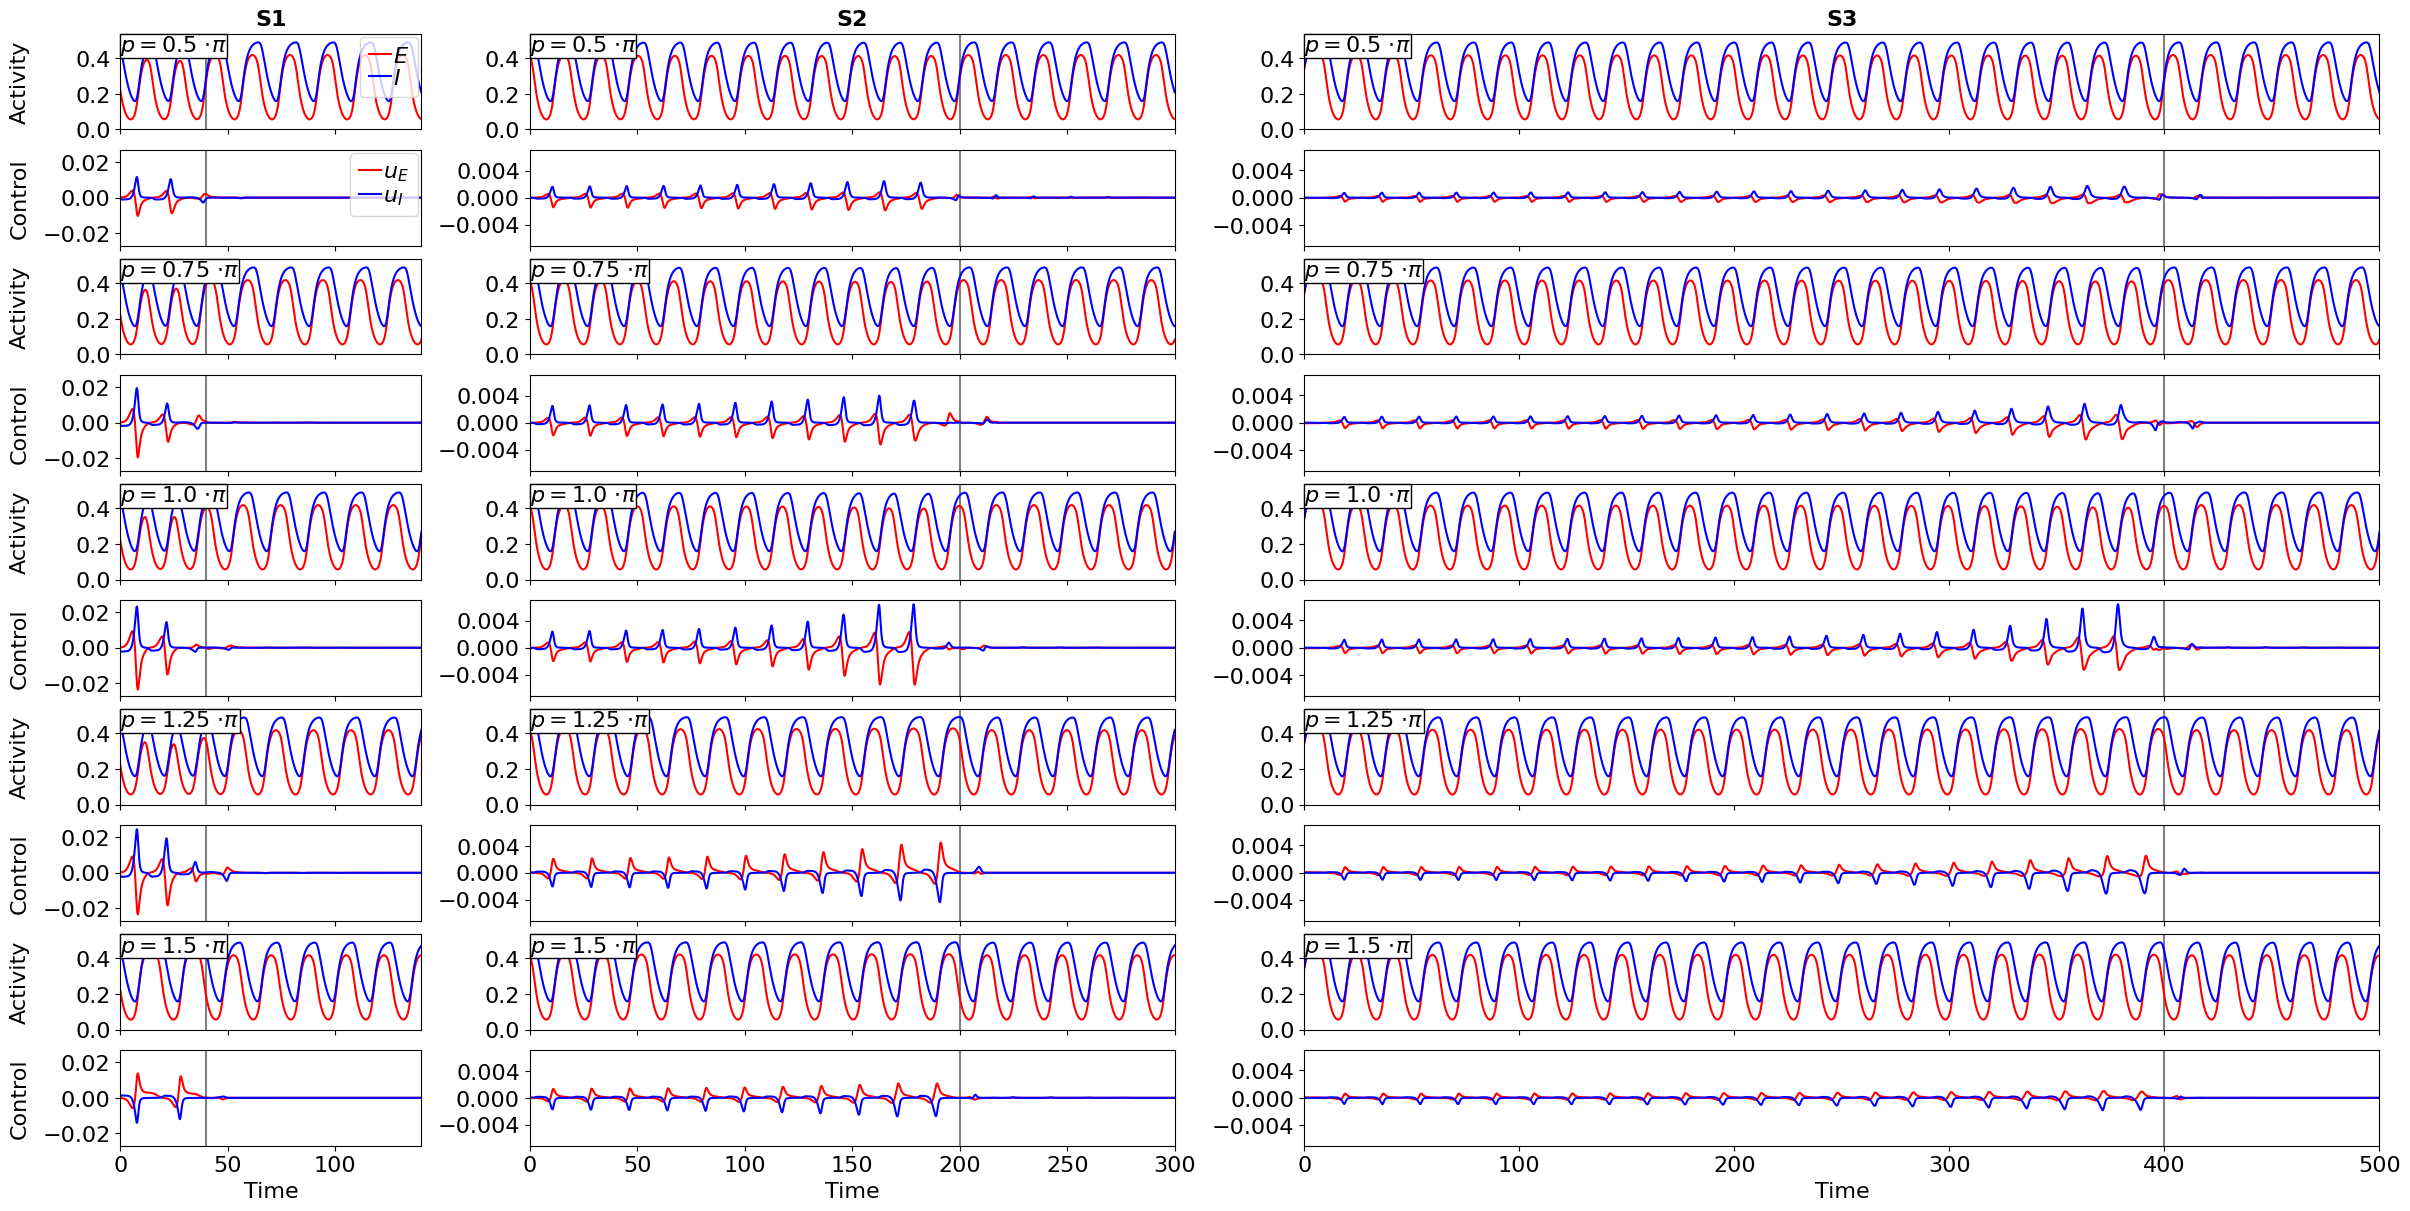

--------------------------- 3
--------------------------- 4
0.03805199013250068 -0.045099520908614 -0.045099520908614
206
[-0.04504358 -0.04506038 -0.04507423 -0.0450851  -0.04509297 -0.04509778
 -0.04509952 -0.04509815 -0.04509363 -0.04508593]


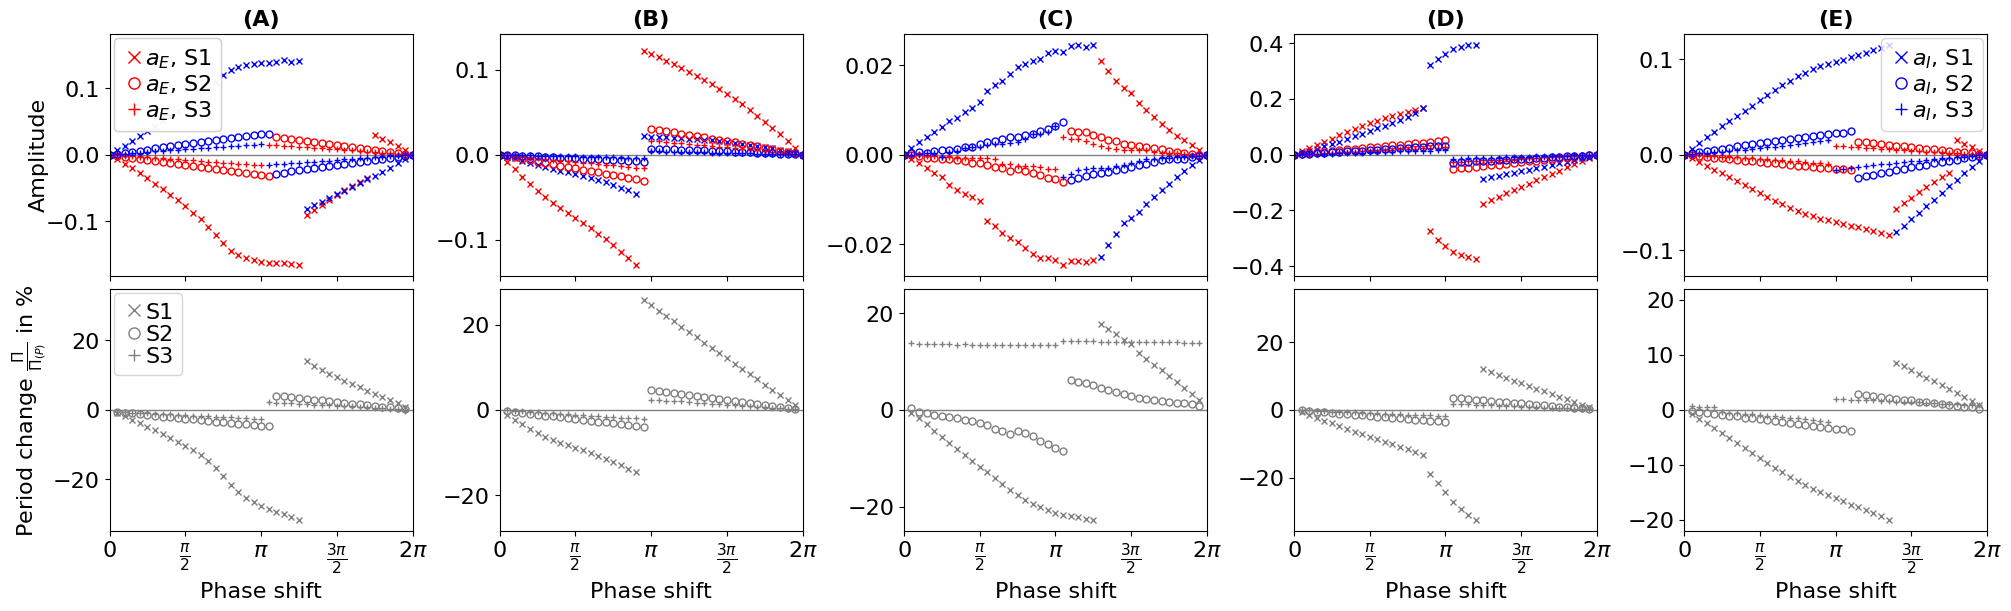

In [347]:
duration = [140., 300., 500.]
dt=0.01

list_w1 = []
list_w2 = []

for ind_p in range(5):

    print("---------------------------", ind_p)

    for ind_sc in range(3):
       
        filename = (add_point[ind_p] + '_' + add_sc[ind_sc])

        filehandler = open(os.path.join(openpath, filename + '_l1.pickle'),"rb")
        results_min_w1 = pickle.load(filehandler)
        filehandler.close()

        list_w1.append(results_min_w1)

        filehandler = open(os.path.join(openpath, filename + '_l2.pickle'),"rb")
        results_min_w2 = pickle.load(filehandler)
        filehandler.close()

        list_w2.append(results_min_w2)

    if ind_p != 2:
        continue

    #ops_plot_traces(list_w1[-3:], dt, "traces_" + add_point[ind_p] + ".png", savepath)
    ops_plot_traces(list_w2[-3:], dt, "traces_" + add_point[ind_p] + "_l2.png", savepath)
    

#ops_ap_scenes_allpoints(list_w1, periods, dt, "plot1_allscenes_allpoints", savepath)
ops_ap_scenes_allpoints(list_w2, periods, dt, "plot1_l2_allscenes_allpoints", savepath)

In [11]:
def normalizetimetrace(trace):
    res = np.zeros(( np.around(40/dt).astype(int) ))

    t_fraction = len(trace)/len(res)

    res[0] =  trace[0]
    for t in range(1, len(res)):
        res[t] = trace[int(t*t_fraction)]

    return res

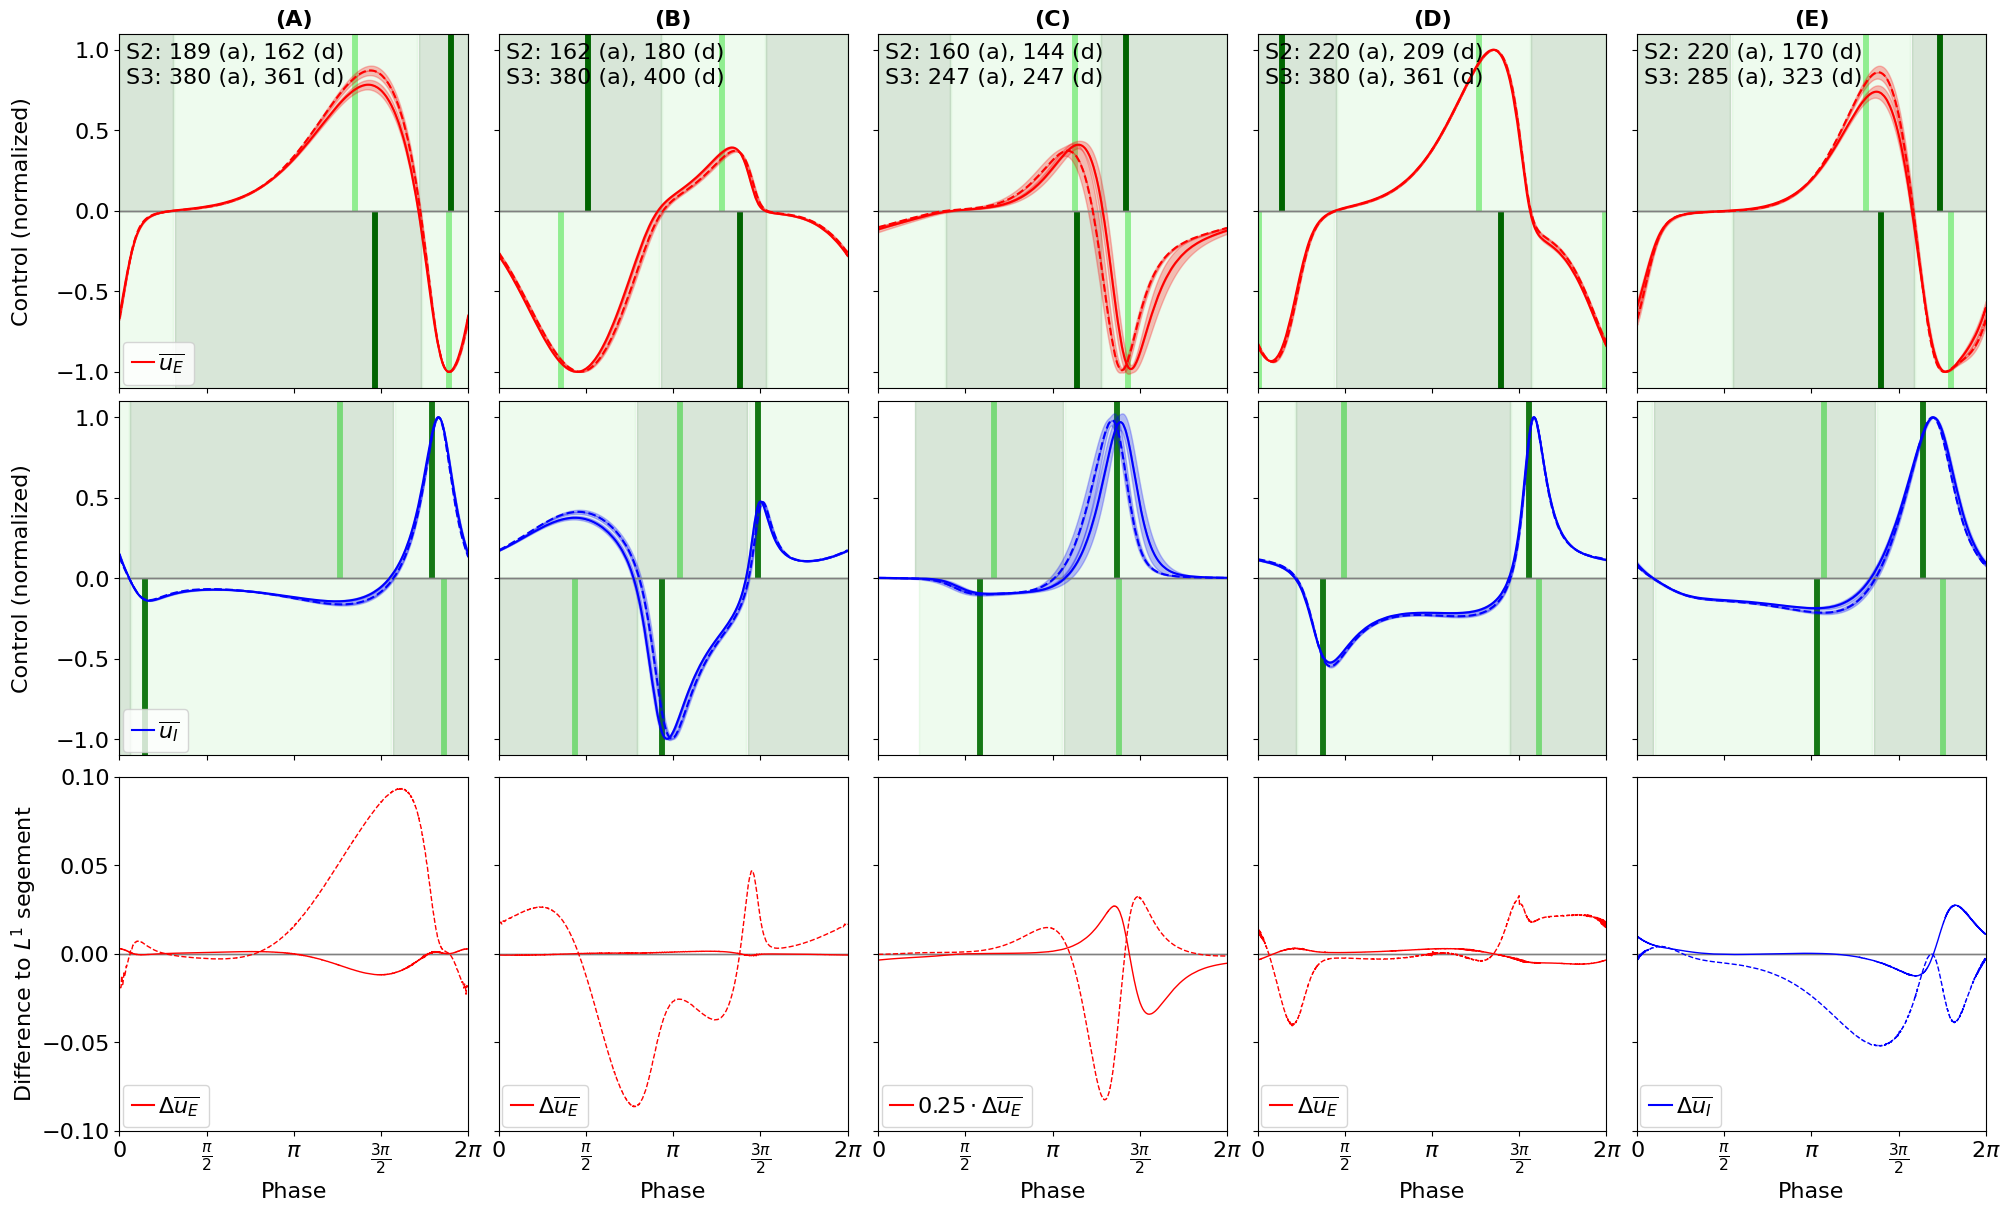

In [348]:
fig, ax = plt.subplots(3, 5, figsize=(20,12), sharey="row", sharex=True, constrained_layout=True)

titlelist = ["(A)", "(B)", "(C)", "(D)", "(E)"]
sclist = ["S1", "S2", "S3"]

start_l2 = [ [0, 0, 1], [0, 0, 0], [2, 1, 4], [0, 1, 1], [0, 0, 1] ]
lim_l2 = [ [1, 9, 20], [1, 9, 20], [3, 9, 17], [2, 12, 20], [0, 10, 20] ]
ind_strategyshift_l2 = [ [19, 22, 21], [18, 20, 20], [32, 22, 21], [22, 21, 21], [19, 23, 20] ]

addind = [1, 1, 1, 1, 1]

text_y = [0., 0.93, 0.86, 0.79]
time = np.linspace(0., 2., np.around(40/dt).astype(int) )

custom_legend = [
        Line2D([0], [0], color="red"),
    ]
custom_legendi = [
        Line2D([0], [0], color="blue"),
    ]

fmult = [1., 1., 0.25, 1., 1.]

for ind_p in range(5):

    tracelist_e = []
    tracelist_i = []
    tracelist_e_delay = []
    tracelist_i_delay = []

    for ind_sc in range(1,3):

        filename = (add_point[ind_p] + '_' + add_sc[ind_sc] + '_l2.pickle')
        
        filehandler = open(os.path.join(openpath, filename),"rb")
        results_min_w2 = pickle.load(filehandler)
        filehandler.close()

        counter = 0
        counter_delay = 0

        signs = np.zeros((41))
        signs[:ind_strategyshift_l2[ind_p][ind_sc]] = 1.
        signs[ind_strategyshift_l2[ind_p][ind_sc]:] = -1.

        for ip in range(1, 40):  

            if ind_p in [2] and ind_sc in [2] and ip in [1]:
                continue
            
            if ind_p in [4] and ind_sc in [2] and ip in [1, 2, 3, 4, 37, 38, 39]:
                continue

            if ind_p in [1] and ind_sc == 1 and ip in [1]:
                continue

            if ind_p in [2] and ind_sc in [1] and ip in [1]:
                continue

            zeros = scipy.signal.find_peaks(results_min_w2["state"][1][ip][0,0,:])[0]

            perl = []
            for k in range(1, len(zeros)):
                perl.append(zeros[k] - zeros[k-1])
        
            for i in range(start_l2[ind_p][ind_sc], min(len(zeros),lim_l2[ind_p][ind_sc]), addind[ind_p]):

                trace = normalizetimetrace( results_min_w2["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]] / np.amax(np.abs(results_min_w2["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]])) )
                trace_i = normalizetimetrace( results_min_w2["control"][1][ip][0,1,zeros[i]:zeros[i+addind[ind_p]]] / np.amax(np.abs(results_min_w2["control"][1][ip][0,1,zeros[i]:zeros[i+addind[ind_p]]])) )
                if signs[ip] > 0:
                    tracelist_e.append(signs[ip] * trace)
                    tracelist_i.append(signs[ip] * trace_i)
                    counter += 1
                else:
                    tracelist_e_delay.append(signs[ip] * trace)
                    tracelist_i_delay.append(signs[ip] * trace_i)
                    counter_delay += 1
                


        ax[0,ind_p].text(0.02, text_y[ind_sc], sclist[ind_sc]  + ": " + str(counter) + " (a), " + str(counter_delay) + " (d)", ha="left", transform=ax[0,ind_p].transAxes)

        ax[0,ind_p].hlines(0., 0., 2., color="grey", linewidth=1)
        ax[1,ind_p].hlines(0., 0., 2., color="grey", linewidth=1)
        ax[2,ind_p].hlines(0., 0., 2., color="grey", linewidth=1)

        #################################################
        ax[0,ind_p].axvspan(0., zer[ind_p,0,0], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='darkgreen', zorder=-10)
        ax[0,ind_p].axvspan(zer[ind_p,0,0]+add, zer[ind_p,0,1], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='lightgreen', zorder=-10)
        ax[0,ind_p].axvspan(zer[ind_p,0,1]+add, 2., ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='darkgreen', zorder=-10)

        ax[0,ind_p].vlines(maxval[ind_p,0,0], 0., 1.1, color="lightgreen", linewidth=4, zorder=-10)
        ax[0,ind_p].vlines(maxval[ind_p,0,1], 0., 1.1, color="darkgreen", linewidth=4, zorder=-10)

        ax[0,ind_p].axvspan(0., zer[ind_p,1,0], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='lightgreen', zorder=-10)
        ax[0,ind_p].axvspan(zer[ind_p,1,0]+add, zer[ind_p,1,1], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='darkgreen', zorder=-10)
        ax[0,ind_p].axvspan(zer[ind_p,1,1]+add, 2., ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='lightgreen', zorder=-10)

        ax[0,ind_p].vlines(maxval[ind_p,1,1], -1.1, 0., color="darkgreen", linewidth=4, zorder=-10)
        if ind_p == 3:
            ax[0,ind_p].vlines(0.006, -1.1, 0., color="lightgreen", linewidth=4, zorder=-10)
            ax[0,ind_p].vlines(1.994, -1.1, 0., color="lightgreen", linewidth=4, zorder=-10)
        else:
            ax[0,ind_p].vlines(maxval[ind_p,1,0], -1.1, 0., color="lightgreen", linewidth=4, zorder=-10)
        ##########################################################
        if ind_p not in [2]:
            ax[1,ind_p].axvspan(0., zer_i[ind_p,0,0], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='lightgreen', zorder=-10)
        ax[1,ind_p].axvspan(zer_i[ind_p,0,0]+add, zer_i[ind_p,0,1], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='darkgreen', zorder=-10)
        ax[1,ind_p].axvspan(zer_i[ind_p,0,1]+add, 2., ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='lightgreen', zorder=-10)

        ax[1,ind_p].vlines(maxval_i[ind_p,0,0], 0., 1.1, color="darkgreen", linewidth=4, zorder=-10)
        ax[1,ind_p].vlines(maxval_i[ind_p,0,1], 0., 1.1, color="lightgreen", linewidth=4, zorder=-10)

        if ind_p not in [2]:
            ax[1,ind_p].axvspan(0., zer_i[ind_p,1,0], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='darkgreen', zorder=-10)
        ax[1,ind_p].axvspan(zer_i[ind_p,1,0]+add, zer_i[ind_p,1,1], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='lightgreen', zorder=-10)
        ax[1,ind_p].axvspan(zer_i[ind_p,1,1]+add, 2., ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='darkgreen', zorder=-10)

        ax[1,ind_p].vlines(maxval_i[ind_p,1,1], -1.1, 0., color="lightgreen", linewidth=4, zorder=-10)
        ax[1,ind_p].vlines(maxval_i[ind_p,1,0], -1.1, 0., color="darkgreen", linewidth=4, zorder=-10)

        ax[0,ind_p].set_title(titlelist[ind_p], fontweight='bold')
        

    tr = np.zeros(( len(tracelist_e), len(trace) ))
    for j in range(len(tracelist_e)):
        tr[j,:] = tracelist_e[j]
    trmean = np.mean(tr, axis=0)
    trstd = np.std(tr, axis=0)
    ax[0,ind_p].plot(time, trmean, color="red", linewidth=1.5)
    ax[0,ind_p].fill_between(time, trmean, trmean+trstd, color="red", alpha=a0)
    ax[0,ind_p].fill_between(time, trmean, trmean-trstd, color="red", alpha=a0)

    ttt = 2

    if ind_p != 4:
        ax[2,ind_p].plot(time[::ttt], fmult[ind_p] * (trmean[::ttt] - tr_mean[ind_p][::ttt]), color="red", linewidth =1)

    tr = np.zeros(( len(tracelist_i), len(trace) ))
    for j in range(len(tracelist_i)):
        tr[j,:] = tracelist_i[j]
    trmean = np.mean(tr, axis=0)
    trstd = np.std(tr, axis=0)
    ax[1,ind_p].plot(time, trmean, color="blue", linewidth=1.5)
    ax[1,ind_p].fill_between(time, trmean, trmean+trstd, color="blue", alpha=a0)
    ax[1,ind_p].fill_between(time, trmean, trmean-trstd, color="blue", alpha=a0)

    if ind_p == 4:
        ax[2,ind_p].plot(time[::ttt], fmult[ind_p] * (trmean[::ttt] - tr_mean[ind_p][::ttt]), color="blue", linewidth =1)

    tr = np.zeros(( len(tracelist_e_delay), len(trace) ))
    for j in range(len(tracelist_e_delay)):
        tr[j,:] = tracelist_e_delay[j]
    trmean = np.mean(tr, axis=0)
    trstd = np.std(tr, axis=0)
    ax[0,ind_p].plot(time, trmean, color="red", linewidth=1.5, linestyle="--")
    ax[0,ind_p].fill_between(time, trmean, trmean+trstd, color="red", alpha=a0)
    ax[0,ind_p].fill_between(time, trmean, trmean-trstd, color="red", alpha=a0)

    if ind_p != 4:
        ax[2,ind_p].plot(time[::ttt], fmult[ind_p] * (trmean[::ttt] - tr_mean[ind_p][::ttt]), color="red", linestyle="--", linewidth =1)

    tr = np.zeros(( len(tracelist_i_delay), len(trace) ))
    for j in range(len(tracelist_i_delay)):
        tr[j,:] = tracelist_i_delay[j]
    trmean = np.mean(tr, axis=0)
    trstd = np.std(tr, axis=0)
    ax[1,ind_p].plot(time, trmean, color="blue", linewidth=1.5, linestyle="--")
    ax[1,ind_p].fill_between(time, trmean, trmean+trstd, color="blue", alpha=a0)
    ax[1,ind_p].fill_between(time, trmean, trmean-trstd, color="blue", alpha=a0)

    if ind_p == 4:
        ax[2,ind_p].plot(time[::ttt], fmult[ind_p] * (trmean[::ttt] - tr_mean[ind_p][::ttt]), color="blue", linestyle="--", linewidth =1)

    ax[0,ind_p].set_xlim(0,time[-1])

    ax[2,ind_p].set_xticks([0., 0.5, 1., 1.5, 2.])
    labels = [item.get_text() for item in ax[2,ind_p].get_xticklabels()]
    labels = [ r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]
    ax[2,ind_p].set_xticklabels(labels)

    ax[2,ind_p].set_xlabel(r"Phase")
    ax[0,ind_p].set_title(titlelist[ind_p], fontweight='bold')

ax[0,0].set_ylim(-1.1, 1.1)
ax[1,0].set_ylim(-1.1, 1.1)
ax[2,0].set_ylim(-0.1, 0.1)
ax[2,0].set_yticks(np.arange(-0.1, 0.11, 0.05))

ax[0,0].legend(
    custom_legend,
    [r"$\overline{u_E}$"],
    loc="lower left",
    labelspacing=0.1,
    handletextpad=0.2,
    handlelength=1,
    borderaxespad=0.15,
)

ax[1,0].legend(
    custom_legendi,
    [r"$\overline{u_I}$"],
    loc="lower left",
    labelspacing=0.1,
    handletextpad=0.2,
    handlelength=1,
    borderaxespad=0.15,
)  

ax[2,0].legend(
    custom_legend,
    [r"$\Delta \overline{u_E}$"],
    loc="lower left",
    labelspacing=0.1,
    handletextpad=0.2,
    handlelength=1,
    borderaxespad=0.15,
)

ax[2,1].legend(
    custom_legend,
    [r"$\Delta \overline{u_E}$"],
    loc="lower left",
    labelspacing=0.1,
    handletextpad=0.2,
    handlelength=1,
    borderaxespad=0.15,
)

ax[2,2].legend(
    custom_legend,
    [r"$0.25 \cdot \Delta \overline{u_E}$"],
    loc="lower left",
    labelspacing=0.1,
    handletextpad=0.2,
    handlelength=1,
    borderaxespad=0.15,
)

ax[2,3].legend(
    custom_legend,
    [r"$\Delta \overline{u_E}$"],
    loc="lower left",
    labelspacing=0.1,
    handletextpad=0.2,
    handlelength=1,
    borderaxespad=0.15,
)



ax[2,4].legend(
    custom_legendi,
    [r"$\Delta \overline{u_I}$"],
    loc="lower left",
    labelspacing=0.1,
    handletextpad=0.2,
    handlelength=1,
    borderaxespad=0.15,
)

ax[0,0].set_ylabel(r"Control (normalized)")
ax[1,0].set_ylabel(r"Control (normalized)")
ax[2,0].set_ylabel(r"Difference to $L^1$ segement")

ax[0,0].yaxis.set_label_coords(-0.25, 0.5)
ax[1,0].yaxis.set_label_coords(-0.25, 0.5)
ax[2,0].yaxis.set_label_coords(-0.23, 0.5)

fig.savefig(os.path.join(savepath, "c_segment_l2.png"))
plt.show()

2 2 1 1 0.00015156775749956253 0.5278016447772149 [  10 1765]
2 2 2 1 0.00030439788946197476 0.47052084611922673 [  10 1764]
2 2 3 1 0.0004614006571229327 0.35595924880322816 [  10 1762]
2 2 4 1 0.0006185151952473712 0.24139765148725179 [  10 1760]
2 2 5 1 0.0007719112692276778 0.12683605417127541 [  10 1758]
2 2 6 1 0.0009284618083742127 0.06955525551326502 [  10 1757]
4 2 1 0 0.0008668628578291661 0.6716417910447747 [  10 1359]
4 2 1 1 0.0008756487917301749 0.07462686567163423 [  10 1351]
4 2 2 0 0.0019086322863948553 0.5970149253731405 [  10 1358]
4 2 3 0 0.0029210692961416725 0.522388059701484 [  10 1357]
4 2 4 0 0.003962617117888063 0.522388059701484 [  10 1357]
4 2 5 0 0.004970186722565921 0.4477611940298498 [  10 1356]
4 2 6 0 0.006003554647303542 0.3731343283582156 [  10 1355]
4 2 7 0 0.007000979830753717 0.29850746268655914 [  10 1354]
4 2 8 0 0.008021934763814721 0.2238805970149249 [  10 1353]
4 2 9 0 0.00900545478908583 0.2238805970149249 [  10 1353]
4 2 10 0 0.0100097673819

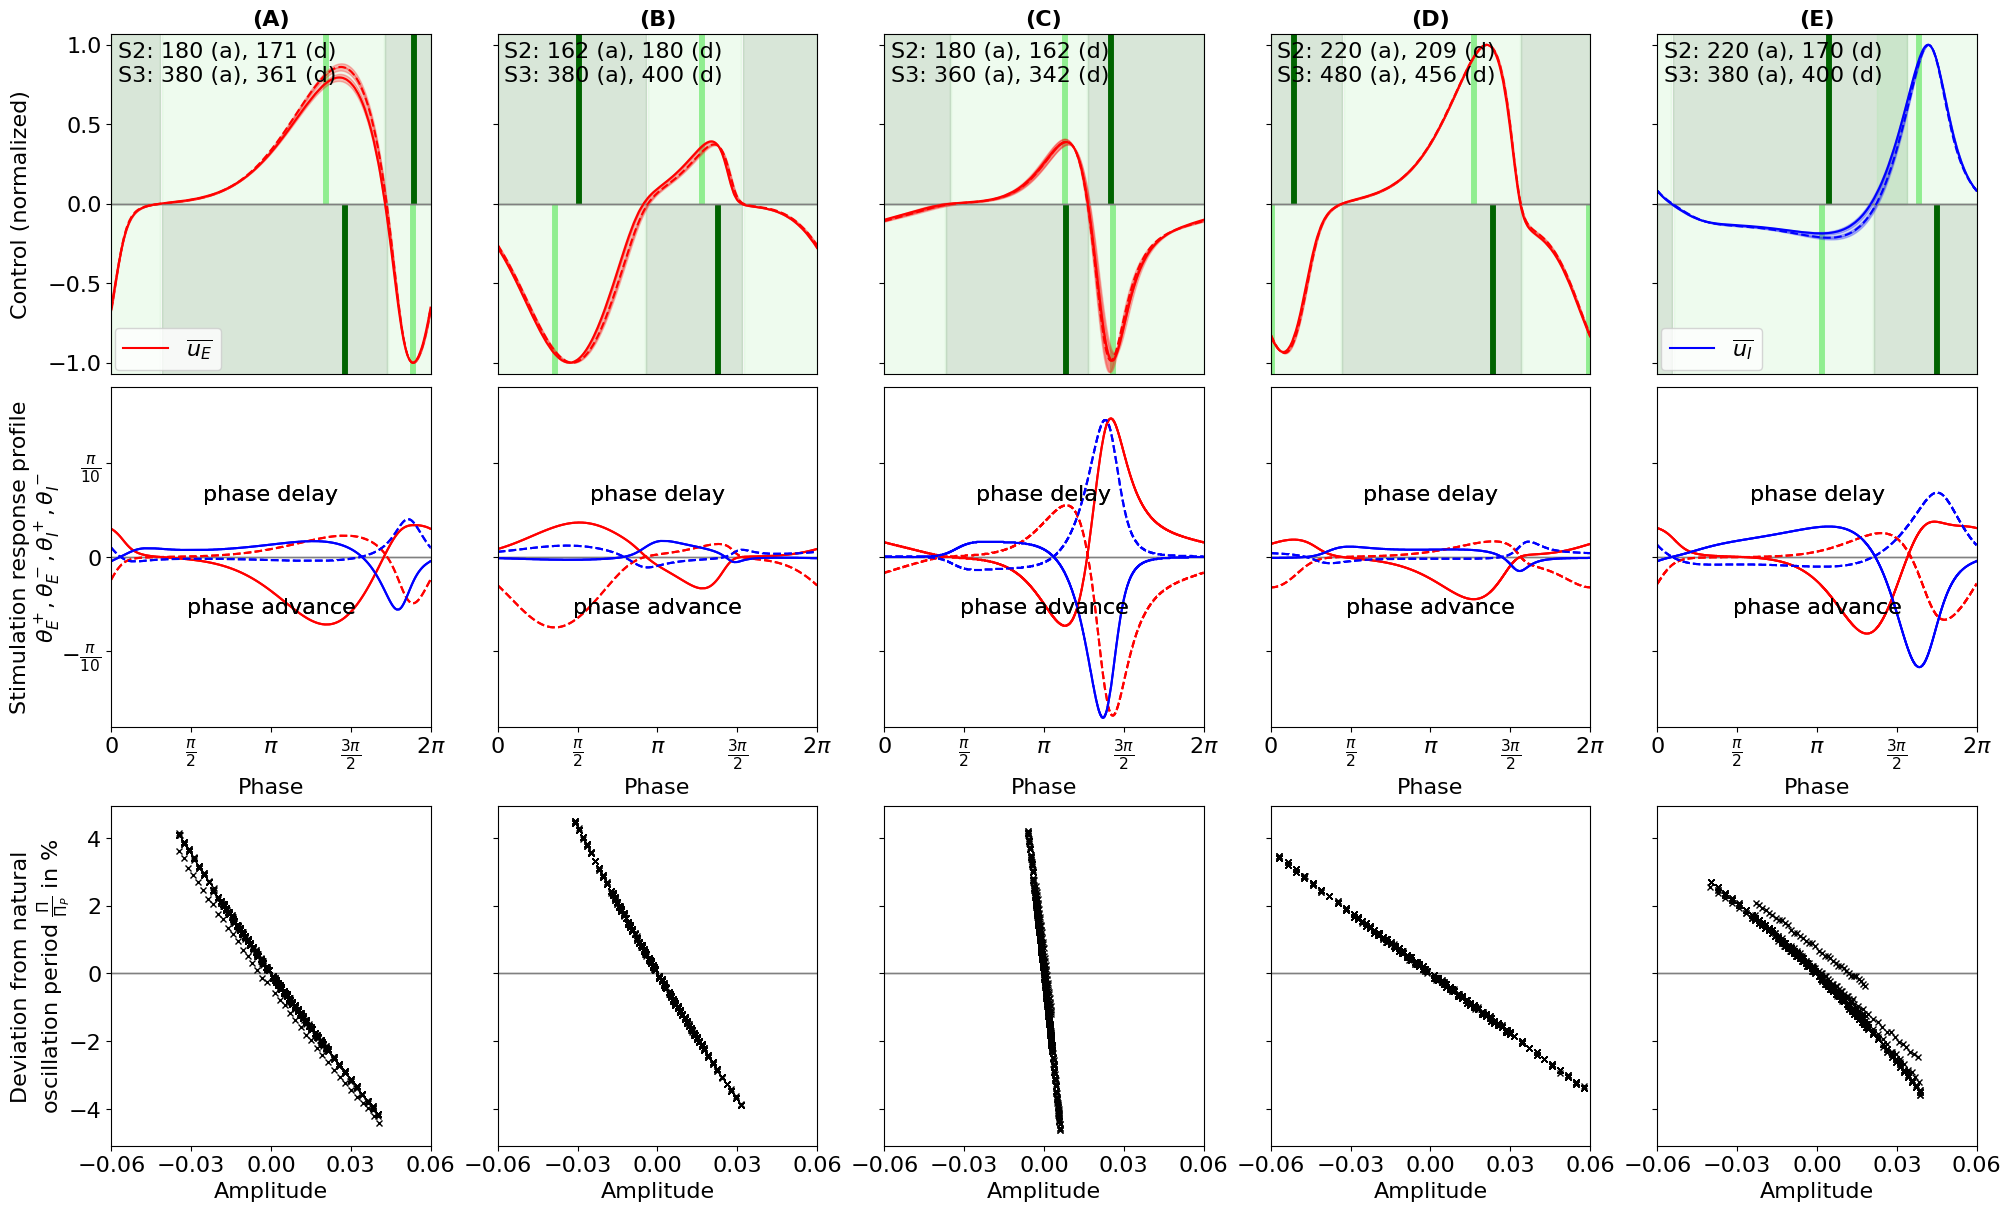

In [345]:
dt = 0.01

fig, ax = plt.subplots(3, 5, figsize=(20,12), sharey="row", sharex="row", constrained_layout=True)

titlelist = ["(A)", "(B)", "(C)", "(D)", "(E)"]
sclist = ["S1", "S2", "S3"]

start = [ [0, 0, 1], [0, 0, 0], [2, 0, 0], [0, 1, 1], [0, 0, 0] ]
lim = [ [1, 9, 20], [1, 9, 20], [3, 9, 18], [2, 12, 25], [1, 10, 20] ]
ind_strategyshift = [ [19, 21, 21], [18, 20, 20], [32, 22, 21], [22, 21, 21], [19, 23, 20] ]

addind = [1, 1, 1, 1, 1]
collist = ["red", "red", "red", "red", "blue"]

text_y = [0., 0.93, 0.86, 0.79]
time = np.linspace(0., 2., np.around(40/dt).astype(int) )

lw_ =  0.5
a1 = 0.08
a0 = 0.25
add = 0.008

ms_ = 5

tr_mean = [None, None, None, None, None]
tr_mean_delay = [None, None, None, None, None]

import matplotlib.patches as mpatches

custom_legend = [
        Line2D([0], [0], color="red"),
    ]

custom_legend_i = [
        Line2D([0], [0], color="blue"),
    ]

for ind_p in range(5):

    tracelist = []
    tracelist_delay = []

    amplist = []
    periodlist = []

    for ind_sc in range(1,3):

        filename = (add_point[ind_p] + '_' + add_sc[ind_sc] + '_l1.pickle')

        filehandler = open(os.path.join(openpath, filename ),"rb")
        results_min_w1 = pickle.load(filehandler)
        filehandler.close()

        counter = 0
        counter_delay = 0

        signs = np.zeros((41))
        signs[:ind_strategyshift[ind_p][ind_sc]] = 1.
        signs[ind_strategyshift[ind_p][ind_sc]:] = -1.

        for ip in range(1, 40):

            if ind_p in [1] and ind_sc == 1 and ip in [1]:
                continue

            if ind_p in [2] and ind_sc in [1] and ip in [1]:
                continue
            
            zeros = scipy.signal.find_peaks(results_min_w1["state"][1][ip][0,0,:])[0]
        
            for i in range(start[ind_p][ind_sc], min(len(zeros),lim[ind_p][ind_sc]), addind[ind_p]):
                if ind_p == 4:
                    trace = normalizetimetrace( results_min_w1["control"][1][ip][0,1,zeros[i]:zeros[i+addind[ind_p]]] / np.amax(np.abs(results_min_w1["control"][1][ip][0,1,zeros[i]:zeros[i+addind[ind_p]]])) )
                else:
                    trace = normalizetimetrace( results_min_w1["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]] / np.amax(np.abs(results_min_w1["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]])) )
                if signs[ip] > 0:
                    tracelist.append(signs[ip] * trace)
                    counter += 1
                else:
                    tracelist_delay.append(signs[ip] * trace)
                    counter_delay += 1
                

                if ind_p in [2] and i == 0:
                    continue

                if zeros[i] > 10:
                    statepeaks = scipy.signal.find_peaks(results_min_w1["state"][1][ip][0,0,zeros[i]-10:zeros[i+addind[ind_p]]+10])[0]
                    if len(statepeaks) != 2:
                        print("WARNING")
                        continue
                    p =  ((statepeaks[1] - statepeaks[0])*dt / periods[ind_p] - 1.)*100.
                    if ind_p == 4:
                        a = signs[ip] * np.amax(np.abs(results_min_w1["control"][1][ip][0,1,zeros[i]:zeros[i+addind[ind_p]]]))
                    else:
                        a = signs[ip] * np.amax(np.abs(results_min_w1["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]]))

                    if a > 0 and p > 0:
                        print(ind_p, ind_sc, ip, i, a, p, statepeaks)
                    ax[2,ind_p].plot(a, p, marker="x", color="black", fillstyle="none", markersize=ms_)


        ax[0,ind_p].text(0.02, text_y[ind_sc], sclist[ind_sc]  + ": " + str(counter) + " (a), " + str(counter_delay) + " (d)", ha="left", transform=ax[0,ind_p].transAxes)

        ax[0,ind_p].hlines(0., 0., 2., color="grey", linewidth=1)
        ax[1,ind_p].hlines(0., 0., 2., color="grey", linewidth=1)
        ax[2,ind_p].hlines(0., -1., 1., color="grey", linewidth=1)
        ax[2,ind_p].set_xlim(-0.06, 0.06)
        ax[2,ind_p].set_xticks(np.arange(-0.06, 0.061, 0.03))

        prctime = np.linspace(0., 2., len(prc_results["ep"][ind_p][-1]))
        ax[1,ind_p].plot(prctime, prc_results["ep"][ind_p][-1] * 2./ periods[ind_p], color="red")
        ax[1,ind_p].plot(prctime, prc_results["em"][ind_p][-1] * 2./ periods[ind_p], color="red", linestyle="--")
        ax[1,ind_p].plot(prctime, prc_results["ip"][ind_p][-1] * 2. / periods[ind_p], color="blue")
        ax[1,ind_p].plot(prctime, prc_results["im"][ind_p][-1] * 2. / periods[ind_p], color="blue", linestyle="--")
        ax[1,ind_p].text(0.5, 0.333, "phase advance", ha="center", transform=ax[1,ind_p].transAxes)
        ax[1,ind_p].text(0.5, 0.666, "phase delay", ha="center", transform=ax[1,ind_p].transAxes)


        #################################################
        if ind_p == 4:
            ax[0,ind_p].axvspan(0., zer_i[ind_p,0,0], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='lightgreen', zorder=-10)
            ax[0,ind_p].axvspan(zer_i[ind_p,0,0]+add, zer[ind_p,0,1], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='darkgreen', zorder=-10)
            ax[0,ind_p].axvspan(zer_i[ind_p,0,1]+add, 2., ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='lightgreen', zorder=-10)

            ax[0,ind_p].vlines(maxval_i[ind_p,0,0], 0., 1.1, color="lightgreen", linewidth=4, zorder=-10)
            ax[0,ind_p].vlines(maxval_i[ind_p,0,1], 0., 1.1, color="darkgreen", linewidth=4, zorder=-10)

            ax[0,ind_p].axvspan(0., zer_i[ind_p,1,0], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='darkgreen', zorder=-10)
            ax[0,ind_p].axvspan(zer_i[ind_p,1,0]+add, zer_i[ind_p,1,1], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='lightgreen', zorder=-10)
            ax[0,ind_p].axvspan(zer_i[ind_p,1,1]+add, 2., ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='darkgreen', zorder=-10)

            ax[0,ind_p].vlines(maxval_i[ind_p,1,1], -1.1, 0., color="darkgreen", linewidth=4, zorder=-10)
            ax[0,ind_p].vlines(maxval_i[ind_p,1,0], -1.1, 0., color="lightgreen", linewidth=4, zorder=-10)
        else:   
            ax[0,ind_p].axvspan(0., zer[ind_p,0,0], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='darkgreen', zorder=-10)
            ax[0,ind_p].axvspan(zer[ind_p,0,0]+add, zer[ind_p,0,1], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='lightgreen', zorder=-10)
            ax[0,ind_p].axvspan(zer[ind_p,0,1]+add, 2., ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='darkgreen', zorder=-10)

            ax[0,ind_p].vlines(maxval[ind_p,0,0], 0., 1.1, color="lightgreen", linewidth=4, zorder=-10)
            ax[0,ind_p].vlines(maxval[ind_p,0,1], 0., 1.1, color="darkgreen", linewidth=4, zorder=-10)

            ax[0,ind_p].axvspan(0., zer[ind_p,1,0], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='lightgreen', zorder=-10)
            ax[0,ind_p].axvspan(zer[ind_p,1,0]+add, zer[ind_p,1,1], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='darkgreen', zorder=-10)
            ax[0,ind_p].axvspan(zer[ind_p,1,1]+add, 2., ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='lightgreen', zorder=-10)

            ax[0,ind_p].vlines(maxval[ind_p,1,1], -1.1, 0., color="darkgreen", linewidth=4, zorder=-10)
            if ind_p == 3:
                ax[0,ind_p].vlines(0.006, -1.1, 0., color="lightgreen", linewidth=4, zorder=-10)
                ax[0,ind_p].vlines(1.994, -1.1, 0., color="lightgreen", linewidth=4, zorder=-10)
            else:
                ax[0,ind_p].vlines(maxval[ind_p,1,0], -1.1, 0., color="lightgreen", linewidth=4, zorder=-10)
            ######################################################################

        #ax[0,ind_p].plot(time, normalizetimetrace(curve[ind_p]/np.amax(np.abs(curve[ind_p]))), color="orange", linestyle="--")

    tr = np.zeros(( len(tracelist), len(trace) ))
    for j in range(len(tracelist)):
        tr[j,:] = tracelist[j]
    trmean = np.mean(tr, axis=0)
    tr_mean[ind_p] = trmean
    trstd = np.std(tr, axis=0)
    ax[0,ind_p].plot(time, trmean, color=collist[ind_p], linewidth=1.5)
    ax[0,ind_p].fill_between(time, trmean, trmean+trstd, color=collist[ind_p], alpha=a0)
    ax[0,ind_p].fill_between(time, trmean, trmean-trstd, color=collist[ind_p], alpha=a0)

    tr = np.zeros(( len(tracelist_delay), len(trace) ))
    for j in range(len(tracelist_delay)):
        tr[j,:] = tracelist_delay[j]
    trmean = np.mean(tr, axis=0)
    tr_mean_delay[ind_p] = trmean
    trstd = np.std(tr, axis=0)
    ax[0,ind_p].plot(time, trmean, color=collist[ind_p], linewidth=1.5, linestyle="--")
    ax[0,ind_p].fill_between(time, trmean, trmean+trstd, color=collist[ind_p], alpha=a0)
    ax[0,ind_p].fill_between(time, trmean, trmean-trstd, color=collist[ind_p], alpha=a0)

    #ax[0,ind_p].set_xlabel(r"Segment phase $\cdot \pi$")
    
    ax[0,ind_p].set_xlim(0,time[-1])
    ax[1,ind_p].set_xlim(0,time[-1])

    ax[1,ind_p].set_xticks([0., 0.5, 1., 1.5, 2.])
    labels = [item.get_text() for item in ax[1,ind_p].get_xticklabels()]
    labels = [ r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]
    ax[1,ind_p].set_xticklabels(labels)


    ax[1,ind_p].set_xlabel(r"Phase")
    ax[2,ind_p].set_xlabel(r"Amplitude")
    ax[0,ind_p].set_title(titlelist[ind_p], fontweight='bold')


ax[0,0].legend(
    custom_legend,
    [r"$\overline{u_E}$"],
    loc="lower left",
    borderaxespad=0.15,
)

ax[0,4].legend(
    custom_legend_i,
    [r"$\overline{u_I}$"],
    loc="lower left",
    borderaxespad=0.15,
)

ax[0,0].set_xticks([])
ax[0,0].set_ylim(-1.07, 1.07)

ax[1,0].set_ylim(-0.18, 0.18)
ax[1,0].set_yticks([-0.1, 0., 0.1])
labels = [item.get_text() for item in ax[1,0].get_yticklabels()]
labels = [ r"$-\frac{\pi}{10}$", r"$0$", r"$\frac{\pi}{10}$"]
ax[1,0].set_yticklabels(labels)

ax[0,0].set_ylabel(r"Control (normalized)")
ax[1,0].set_ylabel(r"Stimulation response profile" + "\n" + r"$\theta_E^+, \theta_E^-, \theta_I^+, \theta_I^-$")
ax[2,0].set_ylabel(r"Deviation from natural" + "\n" + r"oscillation period $\frac{\Pi}{\Pi_P}$ in %")

ax[0,0].yaxis.set_label_coords(-0.25, 0.5)
ax[1,0].yaxis.set_label_coords(-0.15, 0.5)
ax[2,0].yaxis.set_label_coords(-0.12, 0.5)

fig.savefig(os.path.join(savepath, "c_segment.png"))
plt.show()

In [114]:
zer = np.zeros((5, 2, 2))
maxval = np.zeros((5, 2, 2))

zer_i = np.zeros((5, 2, 2))
maxval_i = np.zeros((5, 2, 2))

curve = []

for ip in range(5):
    p = prc_results["point"][ip]
    print(p)

    zerind0 = scipy.signal.find_peaks(-np.abs(prc_results["ep"][ip][-1]))[0][0]
    zerind1 = scipy.signal.find_peaks(-np.abs(prc_results["ep"][ip][-1]))[0][1]
    zer[ip,0, :] = [ 2. * zerind0 / len(prc_results["ep"][ip][-1]), 2. * zerind1 / len(prc_results["ep"][ip][-1]) ]

    if ip in [0,1,2,3]:
        curve.append( np.zeros((len(prc_results["ep"][ip][-1]))) )
        curve[-1][:zerind0] = prc_results["em"][ip][-1][:zerind0]
        curve[-1][zerind0:zerind1] = - prc_results["ep"][ip][-1][zerind0:zerind1]
        curve[-1][zerind1:] = prc_results["em"][ip][-1][zerind1:]

    maxv = np.amax(-prc_results["ep"][ip][-1])
    maxval[ip,0,0] = 2. * np.mean(np.where(maxv == -prc_results["ep"][ip][-1])) / len(prc_results["ep"][ip][-1])
    maxv = np.amax(prc_results["ep"][ip][-1])
    maxval[ip,0,1] = 2. * np.mean(np.where(maxv == prc_results["ep"][ip][-1])) / len(prc_results["ep"][ip][-1])

    print(maxval[ip,0,:])
    
    zerind0 = scipy.signal.find_peaks(-np.abs(prc_results["em"][ip][-1]))[0][0]
    zerind1 = scipy.signal.find_peaks(-np.abs(prc_results["em"][ip][-1]))[0][1]
    zer[ip,1, :] = [ 2. * zerind0 / len(prc_results["em"][ip][-1]), 2. * zerind1 / len(prc_results["em"][ip][-1]) ]

    maxv = np.amax(-prc_results["em"][ip][-1])
    maxval[ip,1,0] = 2. * np.mean(np.where(maxv == -prc_results["em"][ip][-1])) / len(prc_results["em"][ip][-1])
    maxv = np.amax(prc_results["em"][ip][-1])
    maxval[ip,1,1] = 2. * np.mean(np.where(maxv == prc_results["em"][ip][-1])) / len(prc_results["em"][ip][-1])

    print(maxval[ip,1,:])

    if ip == 3:
        maxv = np.amax(-prc_results["em"][ip][-1])
        maxval[ip,1,0] = 0.005

    if ip in [0,3]:
        zerind0 = scipy.signal.find_peaks(-np.abs(prc_results["ip"][ip][-1]))[0][0]
        zerind1 = scipy.signal.find_peaks(-np.abs(prc_results["ip"][ip][-1]))[0][2]
    elif ip == 2:
        zerind0 = np.where(prc_results["ip"][ip][-1] > 0.)[0][0]
        zerind1 =scipy.signal.find_peaks(-np.abs(prc_results["ip"][ip][-1]))[0][0]
    else:
        zerind0 = scipy.signal.find_peaks(-np.abs(prc_results["ip"][ip][-1]))[0][0]
        zerind1 = scipy.signal.find_peaks(-np.abs(prc_results["ip"][ip][-1]))[0][1]

    zer_i[ip,0, :] = [ 2. * zerind0 / len(prc_results["ip"][ip][-1]), 2. * zerind1 / len(prc_results["ip"][ip][-1]) ]

    maxv = np.amax(-prc_results["ip"][ip][-1])
    maxval_i[ip,0,0] = 2. * np.mean(np.where(maxv == -prc_results["ip"][ip][-1])) / len(prc_results["ip"][ip][-1])
    maxv = np.amax(prc_results["ip"][ip][-1])
    maxval_i[ip,0,1] = 2. * np.mean(np.where(maxv == prc_results["ip"][ip][-1])) / len(prc_results["ip"][ip][-1])

    print(maxval_i[ip,0,:])

    if ip in [4]:
        curve.append( np.zeros((len(prc_results["ip"][ip][-1]))) )
        curve[-1][:] = - prc_results["ip"][ip][-1] 

    if ip in [0,4]:
        zerind0 = scipy.signal.find_peaks(-np.abs(prc_results["im"][ip][-1]))[0][0]
        zerind1 = scipy.signal.find_peaks(-np.abs(prc_results["im"][ip][-1]))[0][2]
    else:
        zerind0 = scipy.signal.find_peaks(-np.abs(prc_results["im"][ip][-1]))[0][0]
        zerind1 = scipy.signal.find_peaks(-np.abs(prc_results["im"][ip][-1]))[0][1]
    zer_i[ip,1, :] = [ 2. * zerind0 / len(prc_results["im"][ip][-1]), 2. * zerind1 / len(prc_results["im"][ip][-1]) ]

    maxv = np.amax(-prc_results["im"][ip][-1])
    maxval_i[ip,1,0] = 2. * np.mean(np.where(maxv == -prc_results["im"][ip][-1])) / len(prc_results["im"][ip][-1])
    maxv = np.amax(prc_results["im"][ip][-1])
    maxval_i[ip,1,1] = 2. * np.mean(np.where(maxv == prc_results["im"][ip][-1])) / len(prc_results["im"][ip][-1])

    print(maxval_i[ip,1,:])

print(len(curve))
print(curve[-1].shape)


[1.0, 0.0]
[1.34818034 1.898805  ]
[1.88984248 1.46338946]
[1.79467681 1.26664856]
[0.14850625 1.85947854]
[2.5, 0]
[1.28204583 0.51092562]
[0.35621245 1.38146632]
[1.48774523 1.03891754]
[0.93763624 0.43479185]
[2.6, 1.2]
[1.13053613 1.41870629]
[1.43065268 1.13986014]
[1.36917249 0.66229604]
[0.58245921 1.38344988]
[1.75, 0.0]
[1.27010957 0.14210315]
[0.77859654 1.39310529]
[1.55859166 0.49438803]
[0.37312934 1.61564671]
[2.8, 1.2]
[1.31192386 1.73469235]
[1.79787154 1.40133403]
[1.64063554 1.07232257]
[1.02945365 1.75222963]
5
(13343,)


In [55]:
prc_results = dict([
    ('point', [ [1., 0.], [2.5, 0.], [2.6, 1.2], [1.75,0.], [2.8, 1.2] ]),
    ('ep', [None, None, None, None, None]),
    ('em', [None, None, None, None, None]),
    ('ip', [None, None, None, None, None]),
    ('im', [None, None, None, None, None]),
    ('period', [ np.zeros((len(dist_array))), np.zeros((len(dist_array))), np.zeros((len(dist_array))), np.zeros((len(dist_array))), np.zeros((len(dist_array))) ] ),
])

In [14]:
dist_array = [1.]
width_array = [0.1]
dt_array = [0.01]

for ip in range(len(prc_results['point'])):

    break

    wc = WCModel()
    dist_array = [1.]
    width_array = [0.1]
    dt_array = [0.01]

    if ip in [2]:
        dist_array = [0.1]
    if ip in [4]:
        wc.params.c_excinh = 10
        wc.params.c_inhexc = 16
        wc.params.c_inhinh = 1
    p = prc_results["point"][ip]
    print(p)
    prc_results["ep"][ip], prc_results["em"][ip], prc_results["ip"][ip], prc_results["im"][ip], prc_results["period"][ip] = get_prc(wc, p, dist_array, width_array, dt_array, norm=False)
    wc = WCModel()

0
1
2
3
4


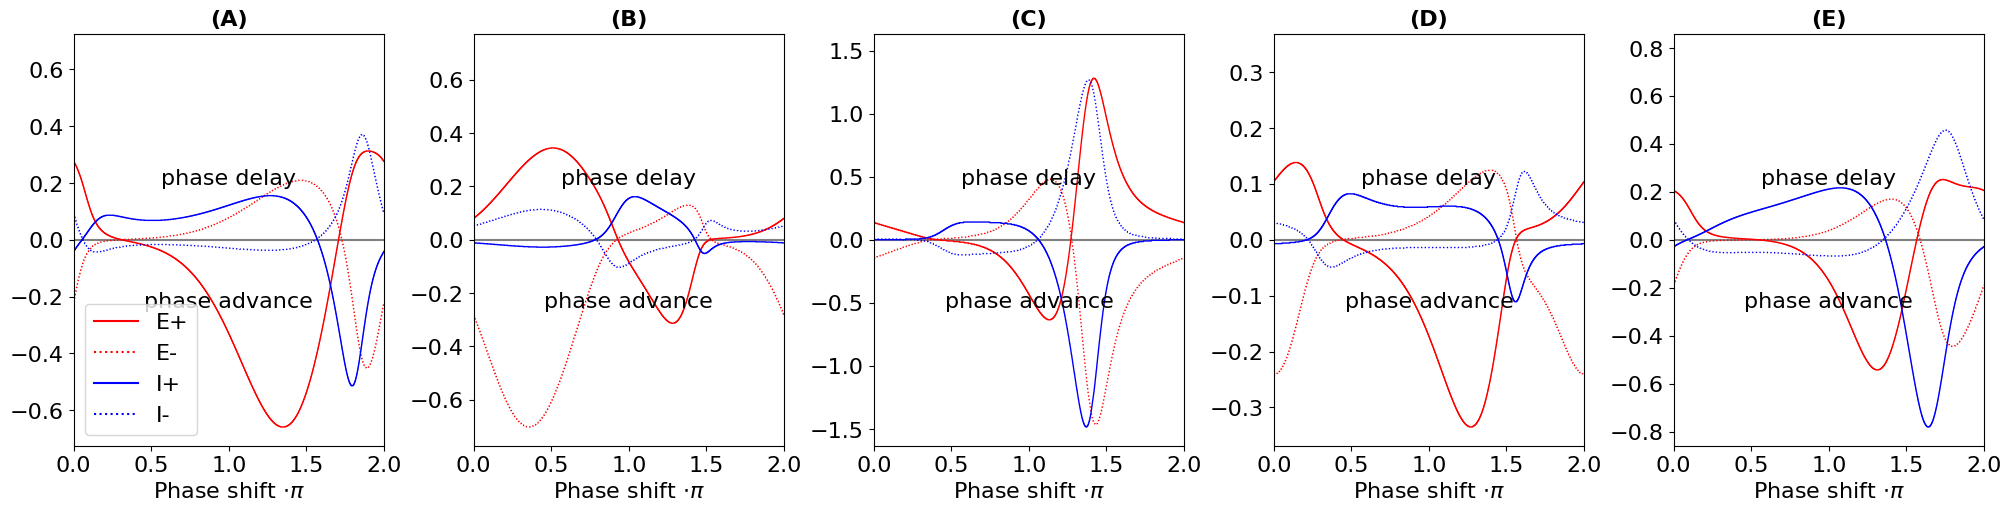

In [182]:
plot_prc(prc_results, dist_array, "prc.png", savepath)

In [181]:
filehandler = open(os.path.join(openpath, "prc_results.pickle"),"rb")
prc_results = pickle.load(filehandler)
filehandler.close()

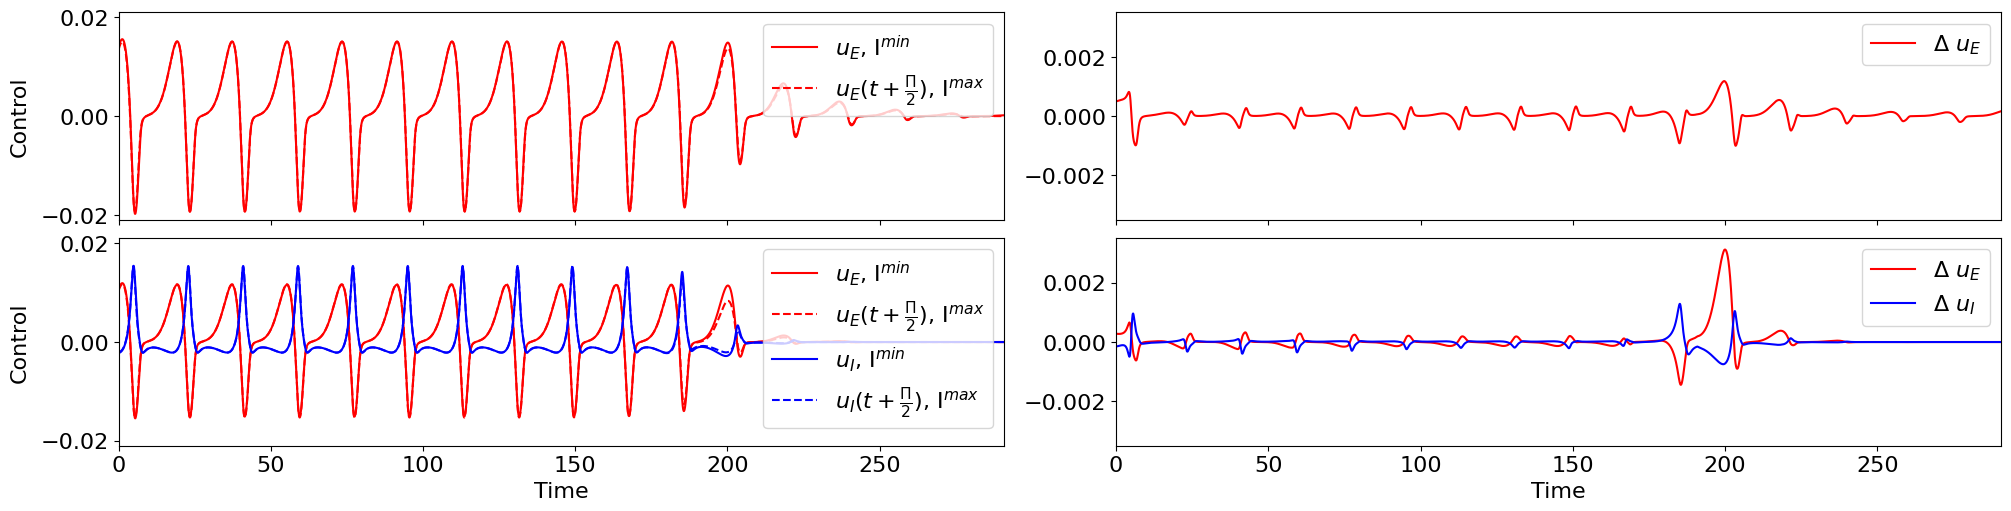

[  123  1926  3731  5536  7341  9146 10951 12756 14561 16366 18176 20039
 21875 23719 25564 27409]
[  123  1928  3733  5537  7342  9146 10951 12756 14560 16366 18181 20045
 21882 23726 25571 27420 28928]


In [107]:
filehandler = open(os.path.join(openpath, "a_s2_l1.pickle"),"rb")
results_min_w1 = pickle.load(filehandler)
filehandler.close()

filehandler = open(os.path.join(openpath, "a_s2_l1_max.pickle"),"rb")
results_peak_w1 = pickle.load(filehandler)
filehandler.close()

filehandler = open(os.path.join(openpath, "a_s2_l2.pickle"),"rb")
results_min_w2 = pickle.load(filehandler)
filehandler.close()

filehandler = open(os.path.join(openpath, "a_s2_l2_max.pickle"),"rb")
results_peak_w2 = pickle.load(filehandler)
filehandler.close()

iadd = -40

t1 = results_min_w1["control"][1][10][0,0,:-np.around(periods[0]/2./dt).astype(int)-iadd]
t2 = results_peak_w1["control"][1][10][0,0,np.around(periods[0]/2./dt).astype(int)+iadd:]

time = np.linspace(0., 300.0 -  periods[0]/2., len(t1))

fig, ax = plt.subplots(2, 2, figsize=(20, 5), sharex=True, sharey="col", constrained_layout=True)

ax[0,0].plot(time, t1, color="red", label=r"$u_E$, I$^{min}$")
ax[0,0].plot(time, t2, color="red", linestyle="--", label=r"$u_E(t+\frac{\Pi}{2})$, I$^{max}$")

ax[0,1].plot(time, t1-t2, color="red", label=r"$\Delta~ u_E$")

t1 = results_min_w2["control"][1][10][0,0,:-np.around(periods[0]/2./dt).astype(int)-iadd]
t2 = results_peak_w2["control"][1][10][0,0,np.around(periods[0]/2./dt).astype(int)+iadd:]

t1i = results_min_w2["control"][1][10][0,1,:-np.around(periods[0]/2./dt).astype(int)-iadd]
t2i = results_peak_w2["control"][1][10][0,1,np.around(periods[0]/2./dt).astype(int)+iadd:]

ax[1,0].plot(time, t1, color="red", label=r"$u_E$, I$^{min}$")
ax[1,0].plot(time, t2, color="red", linestyle="--", label=r"$u_E(t+\frac{\Pi}{2})$, I$^{max}$")
ax[1,0].plot(time, t1i, color="blue", label=r"$u_I$, I$^{min}$")
ax[1,0].plot(time, t2i, color="blue", linestyle="--", label=r"$u_I(t+\frac{\Pi}{2})$, I$^{max}$")

ax[1,1].plot(time, t1-t2, color="red", label=r"$\Delta~ u_E$")
ax[1,1].plot(time, t1i-t2i, color="blue", label=r"$\Delta~ u_I$")

ax[0,0].set_xlim(0., 300 -  periods[0]/2.)
ax[1,0].set_xlabel("Time")
ax[1,1].set_xlabel("Time")
ax[0,0].set_ylabel("Control")
ax[1,0].set_ylabel("Control")

ax[0,0].legend(loc="upper right")
ax[0,1].legend(loc="upper right")
ax[1,0].legend(loc="upper right")
ax[1,1].legend(loc="upper right")

ax[0,0].yaxis.set_label_coords(-0.1, 0.5)
ax[1,0].yaxis.set_label_coords(-0.1, 0.5)

#ax[0,0].hlines(0., 0., 300., color="grey")
#ax[1,0].hlines(0., 0., 300., color="grey")
#ax[0,1].hlines(0., 0., 300., color="grey")
#ax[1,1].hlines(0., 0., 300., color="grey")

ax[0,0].set_ylim(-0.021, 0.021)
ax[0,1].set_ylim(-0.0035, 0.0035)

fig.savefig(os.path.join(savepath, "inits_ps.png"))
plt.show()

print(scipy.signal.find_peaks(t1)[0]) # 152
print(scipy.signal.find_peaks(t2)[0]) # 146

In [43]:
def normalizetimetrace_t(trace, t, dt):
    res = np.zeros(( np.around(t/dt).astype(int) ))

    t_fraction = len(trace)/len(res)

    res[0] =  trace[0]
    for t in range(1, len(res)):
        res[t] = trace[int(t*t_fraction)]

    return res

In [55]:
shiftpp = (periods[0] - periods_ddt[0])/dt
nper = 200. /( periods[0])
print(nper*shiftpp, 0.5*nper*shiftpp)

47.85526699737482 23.92763349868741


In [96]:
filehandler = open(os.path.join(openpath, "a_s2_l2.pickle"),"rb")
results_min_w2 = pickle.load(filehandler)
filehandler.close()

filehandler = open(os.path.join(openpath, "a_s2_l2_dt.pickle"),"rb")
results_peak_w2_dt = pickle.load(filehandler)
filehandler.close()

t1 = results_min_w2["state"][1][10]
c1 = results_min_w2["control"][1][10]
t2 = results_peak_w2_dt["state"][1][10]
c2 = results_peak_w2_dt["control"][1][10]

t1_transform = np.zeros((t2.shape))
c1_transform = np.zeros((c2.shape))

for t in range(t1.shape[2]-1):
    for i in range(10):
        t1_transform[:,:,10*t+i] = t1[:,:,t]
        c1_transform[:,:,10*t+i] = c1[:,:,t]

t1_transform[:,:,-1] = t1_transform[:,:,-2]

# 227

for is0 in [239]:

    t2_0 = t2[:,:,int(2*is0):200000]
    t2_0e = normalizetimetrace_t(t2_0[0,0,:], 200.001, 0.001)
    t2_0i = normalizetimetrace_t(t2_0[0,1,:], 200.001, 0.001)

    t2_1 = t2[:,:,200000:-is0]
    t2_1e = normalizetimetrace_t(t2_1[0,0,:], 100, 0.001)
    t2_1i = normalizetimetrace_t(t2_1[0,1,:], 100, 0.001)

    t2_normalized = np.zeros((t1_transform.shape))
    t2_normalized[0,0,:200001] = t2_0e
    t2_normalized[0,1,:200001] = t2_0i
    t2_normalized[0,0,200001:] = t2_1e
    t2_normalized[0,1,200001:] = t2_1i

    c2_0 = c2[:,:,int(2*is0):200000]
    c2_0e = normalizetimetrace_t(c2_0[0,0,:], 200.001, 0.001)
    c2_0i = normalizetimetrace_t(c2_0[0,1,:], 200.001, 0.001)

    c2_1 = c2[:,:,200000:-is0]
    c2_1e = normalizetimetrace_t(c2_1[0,0,:], 100, 0.001)
    c2_1i = normalizetimetrace_t(c2_1[0,1,:], 100, 0.001)

    c2_normalized = np.zeros((c1_transform.shape))
    c2_normalized[0,0,:200001] = c2_0e
    c2_normalized[0,1,:200001] = c2_0i
    c2_normalized[0,0,200001:] = c2_1e
    c2_normalized[0,1,200001:] = c2_1i

    print(is0, np.amax(np.abs(t1_transform[0,0,::10] - t2_normalized[0,0,::10])))

239 0.0033052112747074536


abs, rel e  0.0033052112747074536 0.02791770021871551
abs, rel i  0.0033345092318838865 0.02791770021871551
abs, rel ue  0.00029997236887889175 0.022496724316834343
abs, rel ui  0.0003472748106279223 0.022496724316834343


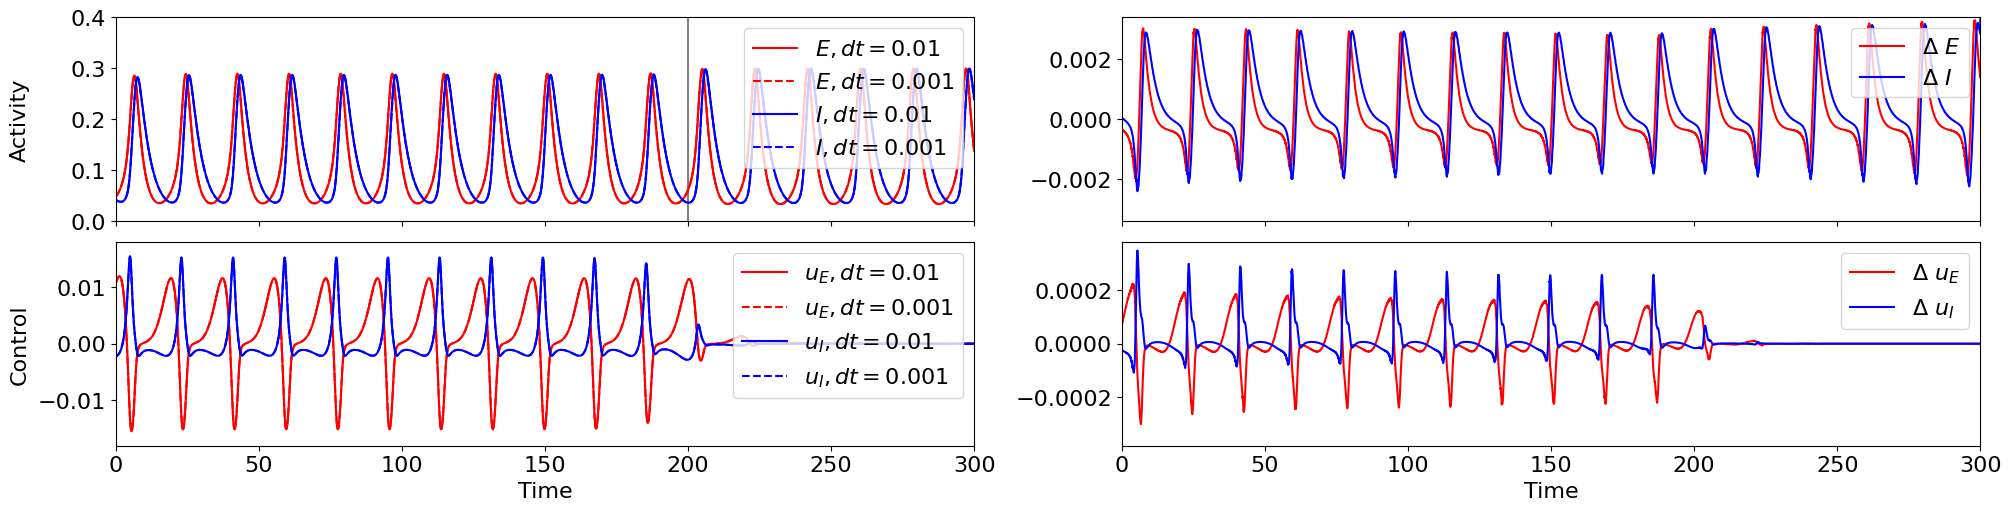

In [97]:
time = np.linspace(0., 300., t2.shape[2])
fig, ax = plt.subplots(2, 2, figsize=(20, 5), sharex=True, constrained_layout=True)

ax[0,0].plot(time, t1_transform[0,0,:], color="red", label=r"$E, dt=0.01~$")
ax[0,0].plot(time, t2_normalized[0,0,:], color="red", linestyle="--", label=r"$E, dt=0.001~$")
ax[0,0].plot(time, t1_transform[0,1,:], color="blue", label=r"$I, dt=0.01~$")
ax[0,0].plot(time, t2_normalized[0,1,:], color="blue", linestyle="--", label=r"$I, dt=0.001~$")

ax[1,0].plot(time, c1_transform[0,0,:], color="red", label=r"$u_E, dt=0.01~$")
ax[1,0].plot(time, c2_normalized[0,0,:], color="red", linestyle="--", label=r"$u_E, dt=0.001~$")
ax[1,0].plot(time, c1_transform[0,1,:], color="blue", label=r"$u_I, dt=0.01~$")
ax[1,0].plot(time, c2_normalized[0,1,:], color="blue", linestyle="--", label=r"$u_I, dt=0.001~$")

ax[0,1].plot(time[::10], t1_transform[0,0,::10]- t2_normalized[0,0,::10], color="red", label=r"$\Delta ~ E$")
ax[0,1].plot(time[::10], t1_transform[0,1,::10]- t2_normalized[0,1,::10], color="blue", label=r"$\Delta ~ I$")

ax[1,1].plot(time[::10], c1_transform[0,0,::10] - c2_normalized[0,0,::10], color="red", label=r"$\Delta ~ u_E$")
ax[1,1].plot(time[::10], c1_transform[0,1,::10] - c2_normalized[0,1,::10], color="blue", label=r"$\Delta ~ u_I$")


abse = np.amax(np.abs(t1_transform[0,0,::10]- t2_normalized[0,0,::10]))
rele = abse / np.mean(t1_transform[0,0,::10])

absi = np.amax(np.abs(t1_transform[0,1,::10]- t2_normalized[0,1,::10]))
reli = absi / np.mean(t1_transform[0,1,::10])
print("abs, rel e ", abse, reli)
print("abs, rel i ", absi, reli)

abse = np.amax(np.abs(c1_transform[0,0,::10]- c2_normalized[0,0,::10]))
rele = abse / np.amax(np.abs(c1_transform[0,0,::10]))

absi = np.amax(np.abs(c1_transform[0,1,::10]- c2_normalized[0,1,::10]))
reli = absi / np.amax(np.abs(c1_transform[0,1,::10]))
print("abs, rel ue ", abse, reli)
print("abs, rel ui ", absi, reli)

ax[0,0].set_xlim(0., duration[1])

ax[1,0].set_xlabel(r"Time")
ax[1,1].set_xlabel(r"Time")
ax[0,0].set_ylim(0., 0.4)
ax[0,0].vlines(200., 0., 0.6, color="grey")

#ax[1,0].hlines(0., 0., 300, color="grey")
#ax[0,1].hlines(0., 0., 300, color="grey")
#ax[1,1].hlines(0., 0., 300, color="grey")

ax[1,0].set_ylim(-0.018, 0.018)
ax[0,1].set_ylim(-0.0034, 0.0034)
ax[1,1].set_ylim(-0.00038, 0.00038)

ax[0,0].legend(loc="upper right")
ax[1,0].legend(loc="upper right")
ax[0,1].legend(loc="upper right")
ax[1,1].legend(loc="upper right")

ax[0,0].set_ylabel(r"Activity")
ax[1,0].set_ylabel(r"Control")
ax[0,0].yaxis.set_label_coords(-0.1,0.5)
ax[1,0].yaxis.set_label_coords(-0.1,0.5)

plt.savefig(os.path.join(savepath, "traces_dt_ps.png"))
plt.show()

[5.7523975582896014e-09, 4.536302888880073e-09] [1.0845904371836745e-07, 1.1479708339479089e-07]
[5.227269086636663e-08, 3.854767721944964e-08] [3.197070391411372e-09, 7.971599103160981e-09]


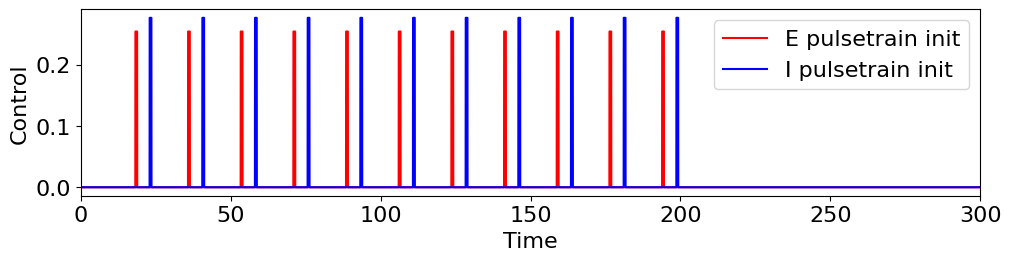

In [108]:
filehandler = open(os.path.join(openpath, "a_s2_l1.pickle"),"rb")
results_min_w1 = pickle.load(filehandler)
filehandler.close()

filehandler = open(os.path.join(openpath, "a_s2_l1_pulsetrain.pickle"),"rb")
results_pulse_w1 = pickle.load(filehandler)
filehandler.close()

t1 = results_min_w1["state"][1][10][0,:,:]
t2 = results_pulse_w1["state"][0][10][0,:,:]
t3 = results_pulse_w1["state"][1][10][0,:,:]

i2 = results_pulse_w1["control_init"][0][10][0,:,:]
i3 = results_pulse_w1["control_init"][1][10][0,:,:]

c1 = results_min_w1["control"][1][10][0,:,:]
c2 = results_pulse_w1["control"][1][10][0,:,:]
c3 = results_pulse_w1["control"][0][10][0,:,:]

custom_legend1 = [
        Line2D([0], [0], color="red"),
        Line2D([0], [0], color="blue"),
    ]

time = np.linspace(0., 300.0, t1.shape[1])

fig, ax = plt.subplots(1, 1, figsize=(10, 2.5), constrained_layout=True)

maxdiff_2 = [np.amax(t1[0,:]-t2[0,:]), np.amax(t1[1,:]-t2[1,:])]
maxdiff_3 = [np.amax(t1[0,:]-t3[0,:]), np.amax(t1[1,:]-t3[1,:])]
print(maxdiff_2, maxdiff_3)

maxdiff_0 = [np.amax(c1[0,:]-c2[0,:]), np.amax(c1[1,:]-c2[1,:])]
maxdiff_1 = [np.amax(c1[0,:]-c3[0,:]), np.amax(c1[1,:]-c3[1,:])]
print(maxdiff_0, maxdiff_1)

ax.plot(time, i2[0,:], color="red", label=r"$Initialization I1")
ax.plot(time, i3[1,:], color="blue", label=r"$Initialization I2")

ax.set_xlim(0., 300.0 )
ax.set_xlabel("Time")
ax.set_ylabel("Control")

ax.legend(
    custom_legend1,
    [r"E pulsetrain init", r"I pulsetrain init"],
    loc="upper right",
)

fig.savefig(os.path.join(savepath, "inits_ps_pulsetrain.png"))
plt.show()

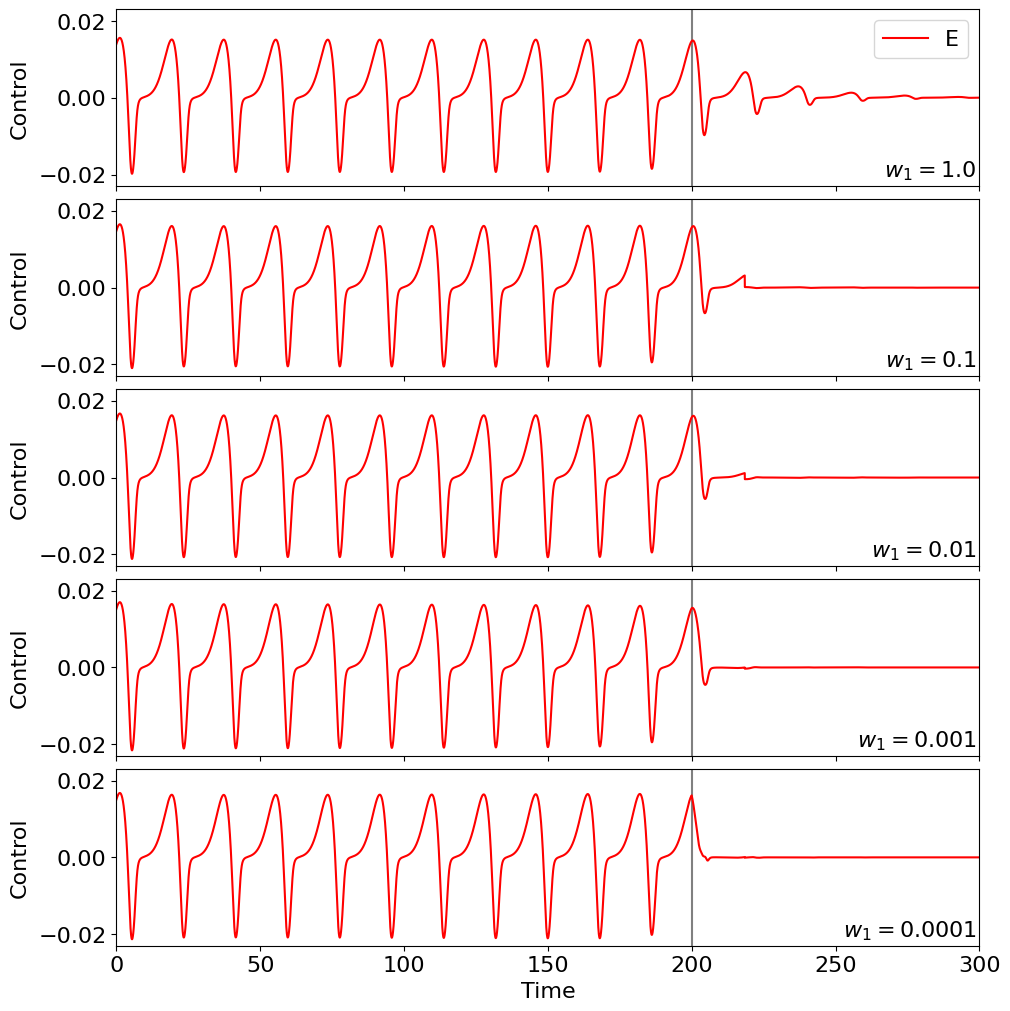

In [106]:
filehandler = open(os.path.join(openpath, "a_s2_l1_wp.pickle"),"rb")
res_wp = pickle.load(filehandler)
filehandler.close()

time = np.linspace(0., 300.0, res_wp["state"][0][10].shape[2])

custom_legend = [
        Line2D([0], [0], color="red"),
    ]
ylim0, ylim1 = -0.023, 0.023

fig, ax = plt.subplots(len(res_wp["state"]), 1, figsize=(10, 10), sharex=True, constrained_layout=True)

for i in range(len(res_wp["control"])):
    ax[i].plot(time, res_wp["control"][i][10][0,0,:], color="red")
    ax[i].set_ylabel("Control")
    ax[i].yaxis.set_label_coords(-0.1, 0.5)
    ax[i].set_ylim(ylim0, ylim1 )
    ax[i].vlines(200., ylim0, ylim1, color="grey")

    ax[i].text( 299, -0.019, (r"$w_1 = $" + str(res_wp["w"][i])), verticalalignment="center", horizontalalignment="right", fontsize=fs_)
                    #transform=ax[i].transAxes,
               # bbox=dict(facecolor="white", alpha=1.0, pad=0.0), )


ax[0].set_xlim(0., 300.0 )
ax[-1].set_xlabel("Time")

ax[0].legend(
    custom_legend,
    [r"E"],
    loc="upper right",
)

fig.savefig(os.path.join(savepath, "ps_wp.png"))
plt.show()

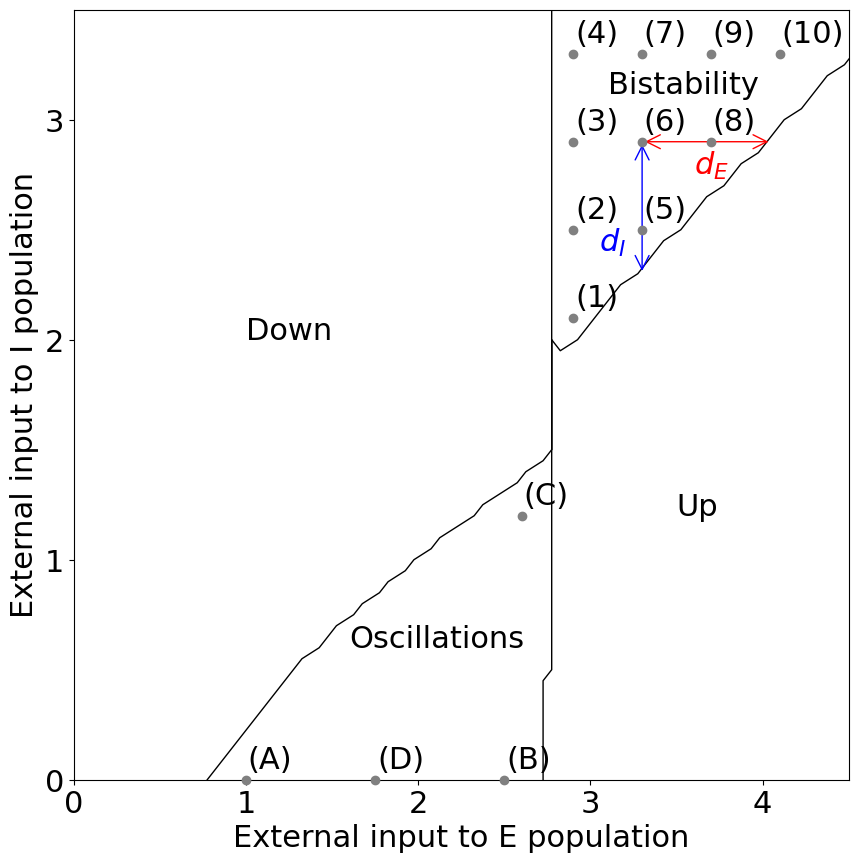

In [352]:
filehandler = open("../../data/boundary_bi.pickle","rb")
boundary_bi = pickle.load(filehandler)
filehandler.close()
boundary_bi_e = boundary_bi[0]
boundary_bi_i = boundary_bi[1]

filehandler = open("../../data/boundary_osc.pickle","rb")
boundary_LC = pickle.load(filehandler)
filehandler.close()
boundary_LC_e = boundary_LC[0]
boundary_LC_i = boundary_LC[1]

points = [[1., 0.], [2.5, 0.], [2.6, 1.2], [1.75, 0.]]
labels = [r"(A)", r"(B)", r"(C)", r"(D)"]

points_bi = [
    [2.9, 2.1], [2.9, 2.5], [2.9, 2.9], [2.9, 3.3],
    [3.3, 2.5], [3.3, 2.9], [3.3, 3.3],
    [3.7, 2.9], [3.7, 3.3],
    [4.1, 3.3],
]
labels_bi = []
for i in range(1, 12, 1):
    labels_bi.append("(" + str(i) + ")")

ms_ = 12
fs_ = 22

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(boundary_LC_e, boundary_LC_i, color='black', linewidth=1)
ax.plot(boundary_bi_e, boundary_bi_i, color='black', linewidth=1)
ax.set_xlabel(r'External input to E population', fontsize=fs_)
ax.set_ylabel(r'External input to I population', fontsize=fs_)
ax.set_xlim(0,4.5)
ax.set_ylim(0,3.5)
ax.set_yticks([0,1,2,3])
ax.tick_params(axis='both', labelsize=fs_)

for i in range(len(points)):
    p=points[i]
    ax.plot(p[0], p[1], marker=".", markersize=ms_, color="grey", zorder=10, clip_on=False)
    ax.text(p[0]+0.01, p[1]+0.05, labels[i], size=fs_)

for i in range(len(points_bi)):
    p=points_bi[i]
    ax.plot(p[0], p[1], marker=".", markersize=ms_, color="grey", zorder=10, clip_on=False)
    ax.text(p[0]+0.01, p[1]+0.05, labels_bi[i], size=fs_)

ax.annotate("", xy=(4.05, points_bi[5][1]), xytext=(points_bi[5][0], points_bi[5][1]), arrowprops=dict(arrowstyle="<->", mutation_scale=25, color="red"))
ax.text(3.6, 2.75, r"$d_E$", fontsize=fs_, color="red")
ax.annotate("", xy=(points_bi[5][0], 2.3), xytext=(points_bi[5][0], points_bi[5][1]), arrowprops=dict(arrowstyle="<->", mutation_scale=25, color="blue"))
ax.text(3.05, 2.4, r"$d_I$", fontsize=fs_, color="blue")

ax.text(1., 2., r"Down", size=fs_)
ax.text(3.5, 1.2, r"Up", size=fs_)
ax.text(1.6, 0.6, r"Oscillations", size=fs_)
ax.text(3.1, 3.12, r"Bistability", size=fs_)

fig.savefig(os.path.join(savepath, "statespace.png"))
plt.show()

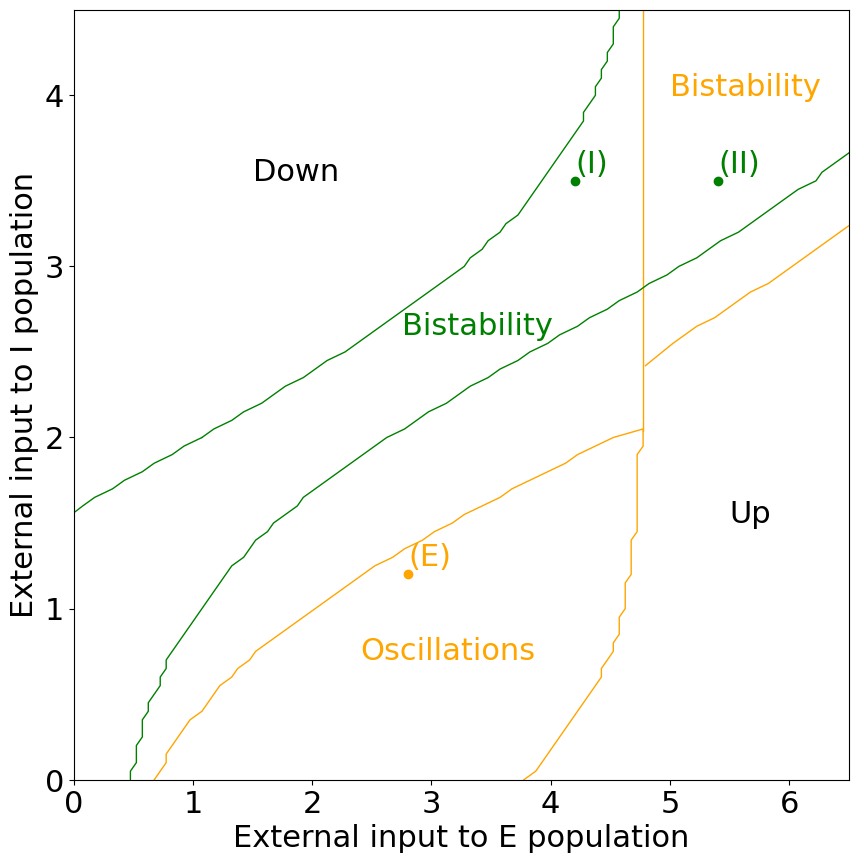

In [353]:
filehandler = open("../../data/boundary_bi_1.pickle","rb")
boundary_bi_1 = pickle.load(filehandler)
filehandler.close()
boundary_bi_e_1 = boundary_bi_1[0]
boundary_bi_i_1 = boundary_bi_1[1]

filehandler = open("../../data/boundary_osc_1.pickle","rb")
boundary_osc_1 = pickle.load(filehandler)
filehandler.close()
boundary_osc_e_1 = boundary_osc_1[0]
boundary_osc_i_1 = boundary_osc_1[1]

fig, ax = plt.subplots(1, 1, figsize=(10,10))

boundary_bi_e_1[62] -= 0.08
boundary_bi_i_1[62] -= 0.08

boundary_bi_i_1[59] -= 0.06

ax.plot(boundary_bi_e_1[:60], boundary_bi_i_1[:60], color='orange', linewidth=1)
ax.plot(boundary_bi_e_1[62:], boundary_bi_i_1[62:], color='orange', linewidth=1)

ax.plot(boundary_osc_e_1, boundary_osc_i_1, color='orange', linewidth=1)

ax.plot(2.8, 1.2, marker=".", markersize=ms_, color="orange", zorder=10, clip_on=False)
ax.text(2.8+0.01, 1.2+0.05, "(E)", size=fs_, color="orange")

filehandler = open("../../data/boundary_bi_2.pickle","rb")
boundary_bi_1 = pickle.load(filehandler)
filehandler.close()
boundary_bi_e_1 = boundary_bi_1[0]
boundary_bi_i_1 = boundary_bi_1[1]

filehandler = open("../../data/boundary_osc_2.pickle","rb")
boundary_osc_1 = pickle.load(filehandler)
filehandler.close()
boundary_osc_e_1 = [0.]
boundary_osc_i_1 = [boundary_osc_1[1][0]-0.04]
for i in range(len(boundary_osc_1[0])):
    boundary_osc_e_1.append(boundary_osc_1[0][i])
    boundary_osc_i_1.append(boundary_osc_1[1][i])

ax.plot(boundary_bi_e_1[:62], boundary_bi_i_1[:62], color='green', linewidth=1)
ax.plot(boundary_bi_e_1[62:], boundary_bi_i_1[62:], color='green', linewidth=1)
ax.plot(boundary_osc_e_1, boundary_osc_i_1, color='green', linewidth=1)


points_bi = [[4.2, 3.5], [5.4, 3.5] ]
labels_bi = [ r"(I)", r"(II)" ]

for i in range(len(points_bi)):
    p=points_bi[i]
    ax.plot(p[0], p[1], marker=".", markersize=ms_, color="green", zorder=10, clip_on=False)
    ax.text(p[0]+0.01, p[1]+0.05, labels_bi[i], size=fs_, color="green")

ax.set_xlim(0,6.5)
ax.set_ylim(0,4.5)

ax.text(1.5, 3.5, r"Down", size=fs_, color="black")
ax.text(5.5, 1.5, r"Up", size=fs_, color="black")
ax.text(2.4, 0.7, r"Oscillations", size=fs_, color="orange")
ax.text(5., 4., r"Bistability", size=fs_, color="orange")

ax.text(2.75, 2.6, r"Bistability", size=fs_, color="green")

ax.set_xlabel(r'External input to E population', fontsize=fs_)
ax.set_ylabel(r'External input to I population', fontsize=fs_)
ax.set_yticks([0,1,2,3,4])
ax.tick_params(axis='both', labelsize=fs_)

fig.savefig(os.path.join(savepath, "statespace_1.png"))
plt.show()